## Churn Modelling

## Data Exploration (Data Understanding)

#### Libraries required for the project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import GradientBoostingClassifier
import sys
sys.path.append(r'/home/jeanlr/projetos/olist/global')
from util import *

/home/jeanlr/projetos/olist/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Read original data (ABT)

In [2]:
abt_00 = pd.read_parquet("../data/processed/abt_sellers/abt.parquet")

In [3]:
abt_00.head()

,seller_id,PK_DATREF,VL_TOT_PRICE,VL_MED_PRICE,VL_MAX_PRICE,VL_MIN_PRICE,VL_TOT_QTD_PHOTOS,VL_MED_QTD_PHOTOS,VL_MAX_QTD_PHOTOS,VL_MIN_QTD_PHOTOS,...,VL_RAZ_MED_U3M_U6M_CONS_MODA,VL_RAZ_MED_U1M_U3M_CONS_ELETRODOMESTC,VL_RAZ_MED_U3M_U6M_CONS_ELETRODOMESTC,VL_RAZ_MED_U1M_U3M_CONS_PETS_AND_BEBES,VL_RAZ_MED_U3M_U6M_CONS_PETS_AND_BEBES,VL_RAZ_MED_U1M_U3M_CONS_PAPEL_AND_CULT,VL_RAZ_MED_U3M_U6M_CONS_PAPEL_AND_CULT,VL_RAZ_MED_U1M_U3M_CONS_ALIM_AND_BEBIDAS,VL_RAZ_MED_U3M_U6M_CONS_ALIM_AND_BEBIDAS,CHURN
3322,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-01,916.02,916.02,916.02,916.02,2.0,2.00,2.0,2.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4033,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-01,2748.06,916.02,916.02,916.02,6.0,2.00,2.0,2.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
0,001cca7ae9ae17fb1caed9dfb1094831,2017-03-01,3419.40,122.12,156.58,101.13,82.0,2.93,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
476,001cca7ae9ae17fb1caed9dfb1094831,2017-04-01,5506.95,128.07,216.09,101.13,124.0,2.88,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
964,001cca7ae9ae17fb1caed9dfb1094831,2017-05-01,9123.92,132.23,216.09,101.13,158.0,2.29,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### Check basic statistics of variables

In [4]:
abt_00.describe()

,PK_DATREF,VL_TOT_PRICE,VL_MED_PRICE,VL_MAX_PRICE,VL_MIN_PRICE,VL_TOT_QTD_PHOTOS,VL_MED_QTD_PHOTOS,VL_MAX_QTD_PHOTOS,VL_MIN_QTD_PHOTOS,VL_TOT_DENSITY,...,VL_RAZ_MED_U3M_U6M_CONS_MODA,VL_RAZ_MED_U1M_U3M_CONS_ELETRODOMESTC,VL_RAZ_MED_U3M_U6M_CONS_ELETRODOMESTC,VL_RAZ_MED_U1M_U3M_CONS_PETS_AND_BEBES,VL_RAZ_MED_U3M_U6M_CONS_PETS_AND_BEBES,VL_RAZ_MED_U1M_U3M_CONS_PAPEL_AND_CULT,VL_RAZ_MED_U3M_U6M_CONS_PAPEL_AND_CULT,VL_RAZ_MED_U1M_U3M_CONS_ALIM_AND_BEBIDAS,VL_RAZ_MED_U3M_U6M_CONS_ALIM_AND_BEBIDAS,CHURN
count,15317,15317.000000,15317.000000,15317.000000,15317.000000,15180.000000,15180.000000,15180.000000,15180.000000,15317.000000,...,1624.00000,2404.000000,2807.000000,1466.000000,1800.000000,997.000000,1233.000000,318.000000,397.000000,15317.000000
mean,2018-01-01 05:12:35.630998016,4820.129931,178.255097,357.493219,101.366532,78.658959,2.279254,3.557246,1.524242,6.748458,...,0.99540,1.007974,1.005116,0.995975,1.006767,1.007954,1.003998,0.995566,1.004408,0.121303
min,2017-03-01 00:00:00,11.630000,11.630000,11.630000,6.080000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.21000,0.060000,0.060000,0.060000,0.240000,0.200000,0.090000,0.240000,0.330000,0.000000
25%,2017-09-01 00:00:00,503.760000,71.760000,117.810000,32.390000,8.000000,1.060000,2.000000,1.000000,0.550000,...,0.99000,0.970000,1.000000,0.970000,1.000000,0.990000,1.000000,1.000000,1.000000,0.000000
50%,2018-02-01 00:00:00,1637.220000,114.950000,212.730000,53.300000,24.000000,1.895000,3.000000,1.000000,1.690000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2018-05-01 00:00:00,4508.420000,188.720000,393.690000,102.660000,71.000000,3.000000,5.000000,2.000000,5.040000,...,1.01000,1.030000,1.010000,1.020000,1.010000,1.020000,1.000000,1.000000,1.000000,0.000000
max,2018-08-01 00:00:00,194015.500000,6922.210000,6922.210000,6922.210000,7317.000000,14.810000,20.000000,14.000000,558.940000,...,1.86000,3.760000,3.980000,2.550000,2.370000,2.570000,2.590000,1.740000,2.400000,1.000000
std,NaN,11225.544591,240.915351,459.659889,196.003359,232.988844,1.467673,2.389356,1.135235,23.351677,...,0.12494,0.229892,0.153057,0.189027,0.141284,0.187255,0.149543,0.148970,0.157911,0.326490


#### Check temporal stability:

##### - Data volume for each harvest (yyyyy)
##### - Event rate (churn rate) for each harvest

In [5]:
abt_00['PK_DATREF'] = pd.to_datetime(abt_00['PK_DATREF']).dt.strftime('%Y%m')
abt_00['PK_DATREF'] = abt_00['PK_DATREF'].astype(str)

resultado = abt_00.groupby('PK_DATREF').agg({'CHURN': 'mean', 'PK_DATREF': 'count'}).rename(columns={'PK_DATREF': 'Volume'}).reset_index()
resultado.columns = ['Safra (AAAAMM)', 'Taxa_de_Evento', 'Volume']

resultado

,Safra (AAAAMM),Taxa_de_Evento,Volume
0,201703,0.163866,476
1,201704,0.157787,488
2,201705,0.216696,563
3,201706,0.154143,519
4,201707,0.143339,593
5,201708,0.168375,683
6,201709,0.137834,711
7,201710,0.139108,762
8,201711,0.176094,937
9,201712,0.164303,846


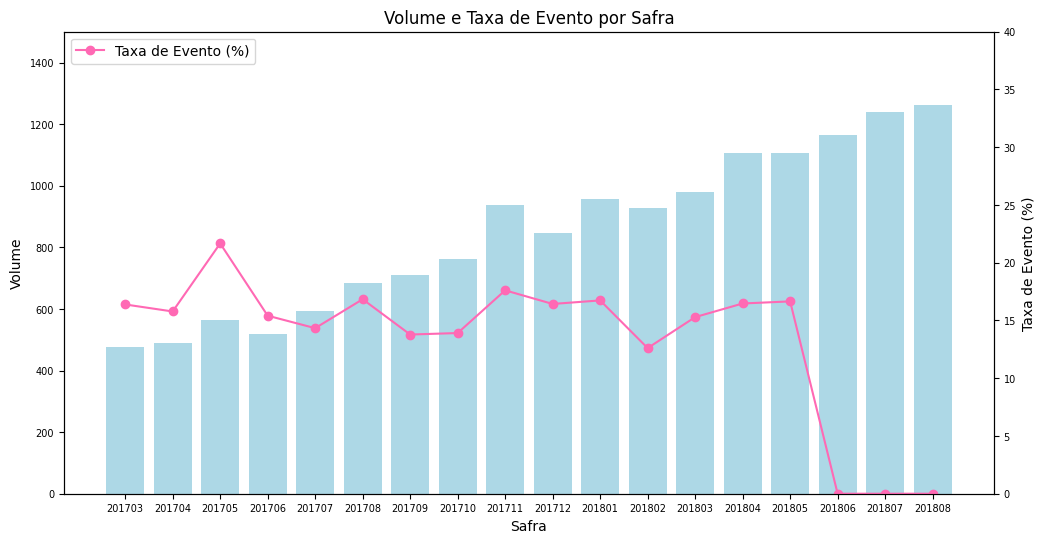

In [6]:
df_tx_evento = plot_tx_event_volume_safra(abt_00,
                                              target='CHURN',
                                              safra='PK_DATREF',
                                              ymax_volume=1500, ymax_taxa_evento=40)

#### Holdout Cross-Validation using out-of-time mode

- We will use the 201703 to 201802 harvests for development
- We will use the 201803 to 201806 harvests for model validation



In [7]:
# Filtrando a base de treino
abt_treino = abt_00[(abt_00['PK_DATREF'] >= '201709') & (abt_00['PK_DATREF'] <= '201802')]

# Filtrando a base de teste
abt_teste = abt_00[(abt_00['PK_DATREF'] >= '201803') & (abt_00['PK_DATREF'] <= '201805')]

abt_treino.shape,abt_teste.shape

((5140, 109), (3191, 109))

In [8]:
resultado = abt_treino.groupby('PK_DATREF').agg({'CHURN': 'mean', 'PK_DATREF': 'count'}).rename(columns={'PK_DATREF': 'Volume'}).reset_index()
resultado.columns = ['Safra (AAAAMM)', 'Taxa_de_Evento', 'Volume']

# Exiba a tabela
resultado

,Safra (AAAAMM),Taxa_de_Evento,Volume
0,201709,0.137834,711
1,201710,0.139108,762
2,201711,0.176094,937
3,201712,0.164303,846
4,201801,0.167364,956
5,201802,0.126078,928


In [9]:
resultado = abt_teste.groupby('PK_DATREF').agg({'CHURN': 'mean', 'PK_DATREF': 'count'}).rename(columns={'PK_DATREF': 'Volume'}).reset_index()
resultado.columns = ['Safra (AAAAMM)', 'Taxa_de_Evento', 'Volume']

# Exiba a tabela
resultado

,Safra (AAAAMM),Taxa_de_Evento,Volume
0,201803,0.152905,981
1,201804,0.164706,1105
2,201805,0.166516,1105


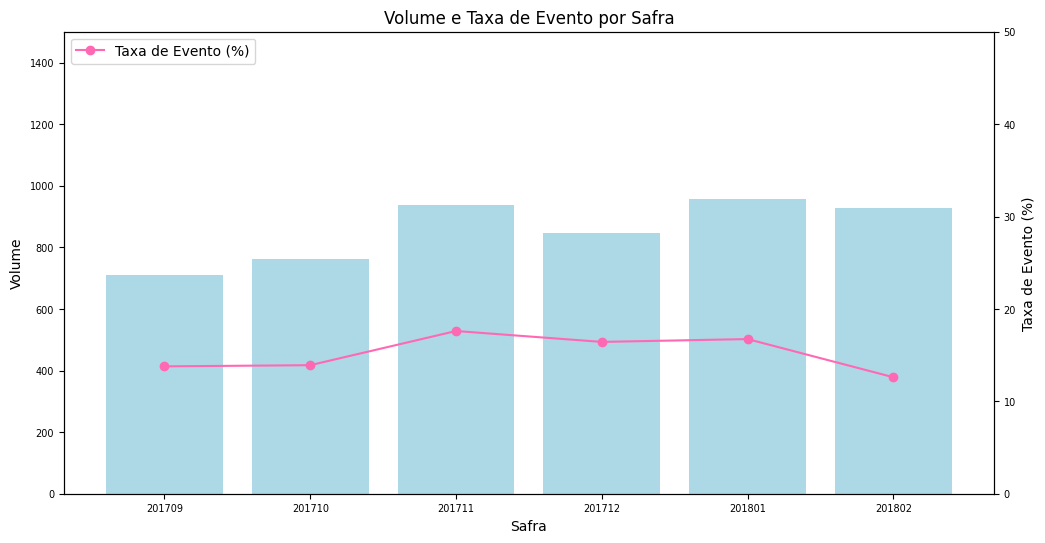

In [10]:
df_tx_evento = plot_tx_event_volume_safra(abt_treino,
                                              target='CHURN',
                                              safra='PK_DATREF',
                                              ymax_volume=1500, ymax_taxa_evento=50)

#### Data Preparation

 - Handling of missing values
 - Data Standardization (zscore)

In [11]:
metadados = generate_metadata(abt_treino,
                                          ids=['seller_id','PK_DATREF'],
                                          targets=['CHURN'],
                                          orderby = 'PC_NULOS')

metadados

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,VL_RAZ_MED_U1M_U3M_CONS_ALIM_AND_BEBIDAS,Explicativa,5048,98.21,36,float64
1,VL_MED_U1M_CONS_ALIM_AND_BEBIDAS,Explicativa,5048,98.21,89,float64
2,VL_MED_U3M_CONS_ALIM_AND_BEBIDAS,Explicativa,5016,97.59,99,float64
3,VL_RAZ_MED_U3M_U6M_CONS_ALIM_AND_BEBIDAS,Explicativa,5016,97.59,36,float64
4,VL_MED_U6M_CONS_ALIM_AND_BEBIDAS,Explicativa,4992,97.12,104,float64
...,...,...,...,...,...,...
104,VL_TOT_DAYS_ESTIMATED_DELIVERY,Explicativa,0,0.00,1856,int64
105,VL_MIN_DAYS_DELIVERY,Explicativa,0,0.00,54,float64
106,VL_MAX_DAYS_DELIVERY,Explicativa,0,0.00,131,float64
107,VL_MED_DAYS_DELIVERY,Explicativa,0,0.00,1296,float64


#### Missing data handling

 - Drop variables with more than 70% of nulls
 - Imputation with mean for those with less than 70% of nulls

In [12]:
missing_cutoff = 70

drop_vars_nulos = metadados[(metadados['PC_NULOS'] >= missing_cutoff)]
lista_drop_vars = list(drop_vars_nulos.FEATURE.values)
print('Variáveis que serão excluídas por alto percentual de nulos: ',lista_drop_vars)
  # retirando lista de variáveis com alto percentual de nulos
abt_treino_01 = abt_treino.drop(axis=1,columns=lista_drop_vars)
abt_treino_01.shape



Variáveis que serão excluídas por alto percentual de nulos:  ['VL_RAZ_MED_U1M_U3M_CONS_ALIM_AND_BEBIDAS', 'VL_MED_U1M_CONS_ALIM_AND_BEBIDAS', 'VL_MED_U3M_CONS_ALIM_AND_BEBIDAS', 'VL_RAZ_MED_U3M_U6M_CONS_ALIM_AND_BEBIDAS', 'VL_MED_U6M_CONS_ALIM_AND_BEBIDAS', 'VL_MED_CONS_ALIM_AND_BEBIDAS', 'VL_RAZ_MED_U1M_U3M_CONS_PAPEL_AND_CULT', 'VL_MED_U1M_CONS_PAPEL_AND_CULT', 'VL_RAZ_MED_U3M_U6M_CONS_PAPEL_AND_CULT', 'VL_MED_U3M_CONS_PAPEL_AND_CULT', 'VL_MED_U6M_CONS_PAPEL_AND_CULT', 'VL_MED_CONS_PAPEL_AND_CULT', 'VL_MED_U1M_CONS_PETS_AND_BEBES', 'VL_RAZ_MED_U1M_U3M_CONS_PETS_AND_BEBES', 'VL_RAZ_MED_U1M_U3M_CONS_MODA', 'VL_MED_U1M_CONS_MODA', 'VL_MED_U3M_CONS_PETS_AND_BEBES', 'VL_RAZ_MED_U3M_U6M_CONS_PETS_AND_BEBES', 'VL_RAZ_MED_U3M_U6M_CONS_MODA', 'VL_MED_U3M_CONS_MODA', 'VL_MED_U6M_CONS_PETS_AND_BEBES', 'VL_MED_CONS_PETS_AND_BEBES', 'VL_MED_U6M_CONS_MODA', 'VL_MED_CONS_MODA', 'VL_MED_U1M_CONS_ELETRODOMESTC', 'VL_RAZ_MED_U1M_U3M_CONS_ELETRODOMESTC', 'VL_RAZ_MED_U1M_U3M_CONS_BLZ_SAUDE', 'VL_MED_U1M

(5140, 55)

In [13]:
# Salvando a lista em um arquivo .pkl
with open('../artifacts/prd_drop_nullvars.pkl', 'wb') as f:
    pickle.dump(lista_drop_vars, f)

In [14]:
abt_teste = abt_teste.drop(columns=lista_drop_vars)

In [15]:
abt_treino_02 = abt_treino_01.drop(axis=1,columns=['CHURN','PK_DATREF','seller_id'],)

In [16]:
abt_treino_02, means = fillna_numeric(abt_treino_02)

with open('../artifacts/prd_fillna.pkl', 'wb') as f:
  pickle.dump(means, f)

/home/jeanlr/projetos/olist/global/util.py:1139: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(means[col], inplace=True)


#### Apply null handling to the test base (out-of-time)

In [17]:
with open('../artifacts/prd_fillna.pkl', 'rb') as f:
  loaded_means = pickle.load(f)
loaded_means


{'VL_TOT_PRICE': 5068.934387159533,
 'VL_MED_PRICE': 174.88241439688719,
 'VL_MAX_PRICE': 342.7639649805448,
 'VL_MIN_PRICE': 100.6832626459144,
 'VL_TOT_QTD_PHOTOS': 83.02622239747635,
 'VL_MED_QTD_PHOTOS': 2.273582413249211,
 'VL_MAX_QTD_PHOTOS': 3.593454258675079,
 'VL_MIN_QTD_PHOTOS': 1.4978312302839116,
 'VL_TOT_DENSITY': 7.202729571984437,
 'VL_MED_DENSITY': 0.2326128404669261,
 'VL_MAX_DENSITY': 0.578807392996109,
 'VL_MIN_DENSITY': 0.11185408560311286,
 'VL_TOT_PRC_PER_KG': 6367.166737354086,
 'VL_MED_PRC_PER_KG': 195.68444163424124,
 'VL_MAX_PRC_PER_KG': 410.9848073929961,
 'VL_MIN_PRC_PER_KG': 92.5361420233463,
 'VL_TOT_VOL_CM3': 596151.5151750973,
 'VL_MED_VOL_CM3': 18011.319167315178,
 'VL_MAX_VOL_CM3': 37961.27003891051,
 'VL_MIN_VOL_CM3': 9404.67626459144,
 'VL_TOT_COST_REL_FRETE': 11.70287354085603,
 'VL_MED_COST_REL_FRETE': 0.30441245136186773,
 'VL_MAX_COST_REL_FRETE': 0.7236381322957198,
 'VL_MIN_COST_REL_FRETE': 0.12938715953307392,
 'VL_TOT_DAYS_DELIVERY': 461.45875

In [18]:
abt_teste = fillna_num_prod(abt_teste,loaded_means)
abt_teste.shape

/home/jeanlr/projetos/olist/global/util.py:1173: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


(3191, 55)

#### Bringing Target to Training Table

In [19]:
abt_treino_03 = abt_treino_02.merge(abt_treino[['CHURN','PK_DATREF']], left_index=True, right_index=True, how='inner')
abt_treino_03.head()


,VL_TOT_PRICE,VL_MED_PRICE,VL_MAX_PRICE,VL_MIN_PRICE,VL_TOT_QTD_PHOTOS,VL_MED_QTD_PHOTOS,VL_MAX_QTD_PHOTOS,VL_MIN_QTD_PHOTOS,VL_TOT_DENSITY,VL_MED_DENSITY,...,VL_TOT_CONS_BLZ_SAUDE,VL_TOT_CONS_MODA,VL_TOT_CONS_ELETRODOMESTC,VL_TOT_CONS_PETS_AND_BEBES,VL_TOT_CONS_PAPEL_AND_CULT,VL_TOT_CONS_ALIM_AND_BEBIDAS,VL_RAZ_MED_U1M_U3M_CONS_OUTROS,VL_RAZ_MED_U3M_U6M_CONS_OUTROS,CHURN,PK_DATREF
3322,916.02,916.02,916.02,916.02,2.0,2.00,2.0,2.0,0.19,0.19,...,0.0,0.0,916.02,0.0,0.0,0.0,1.010265,1.003617,0,201709
4033,2748.06,916.02,916.02,916.02,6.0,2.00,2.0,2.0,0.57,0.19,...,0.0,0.0,2748.06,0.0,0.0,0.0,1.010265,1.003617,1,201710
3323,18409.61,138.42,216.09,101.13,261.0,1.96,4.0,1.0,57.68,0.43,...,0.0,0.0,0.00,0.0,0.0,0.0,1.030000,1.020000,0,201709
4034,19911.26,141.21,216.09,101.13,250.0,1.77,4.0,1.0,61.76,0.44,...,0.0,0.0,0.00,0.0,0.0,0.0,1.000000,1.030000,0,201710
4795,21288.31,140.98,188.82,117.39,236.0,1.56,4.0,1.0,66.88,0.44,...,0.0,0.0,0.00,0.0,0.0,0.0,0.980000,1.020000,0,201711


#### Data scaling adjustment

 - Normalization
 - Standardization

We will not scale the data because for the variable selection process we will use a tree-based algorithm and for modeling we will categorize all numerical variables.

### Variable selection

In [20]:
X = abt_treino_03.drop(axis=1,columns=['CHURN','PK_DATREF'])
y = abt_treino_03.CHURN

# Treinar modelo com algoritmo Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42) # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

GradientBoostingClassifier(random_state=42)

#### Obtain the importance of variables and select according to cutoff

Número de features selecionadas:  5


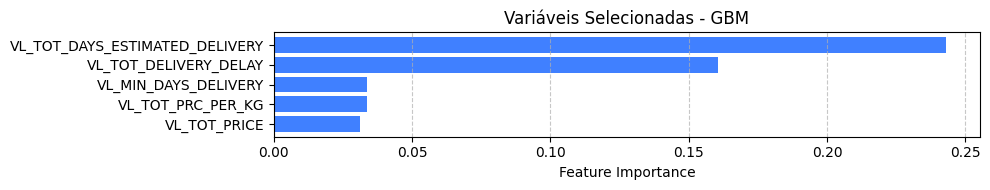

In [21]:
# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.12

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - GBM")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

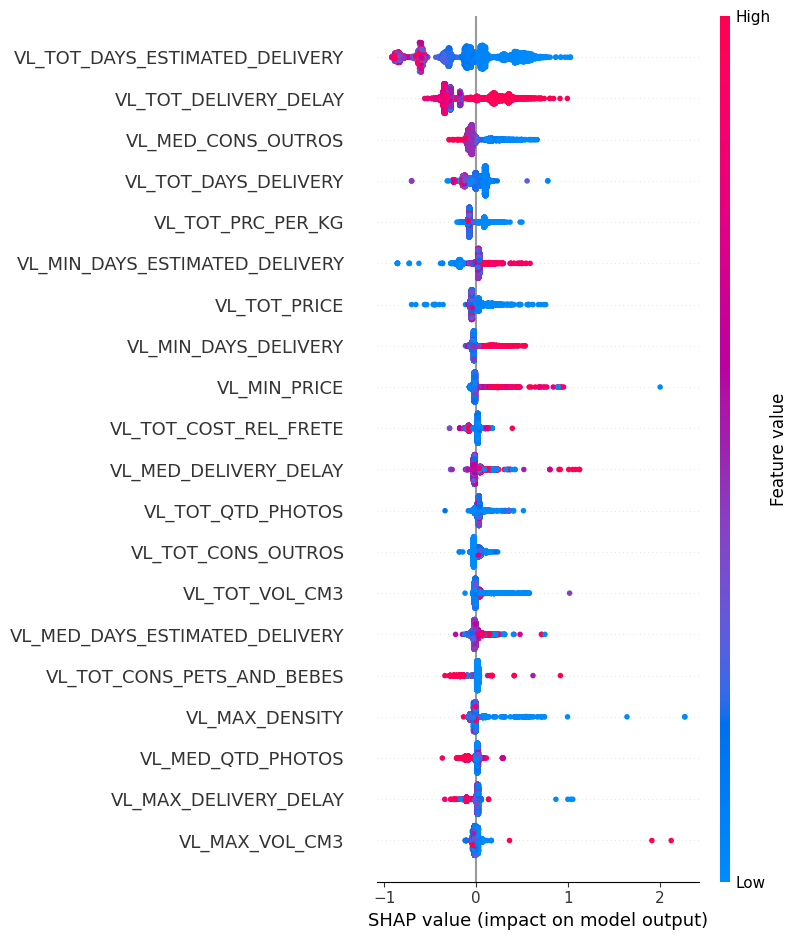

In [22]:
# SHAP Values
import shap


shap_explainer = shap.Explainer(clf)
shap_values = shap_explainer(X)
#shap.summary_plot(shap_values, X_validation, plot_type='dot', max_display=25)
shap.summary_plot(shap_values, X)

#### List of selected variables

In [23]:
lista_vars_fs =list(selected_features_df.Feature)
lista_vars_fs

['VL_TOT_PRICE',
 'VL_TOT_PRC_PER_KG',
 'VL_MIN_DAYS_DELIVERY',
 'VL_TOT_DELIVERY_DELAY',
 'VL_TOT_DAYS_ESTIMATED_DELIVERY']

In [24]:
# Salvar a lista como um arquivo .pkl
with open('../artifacts/selected_features.pkl', 'wb') as f:
    pickle.dump(lista_vars_fs, f)

#### Generate new training and testing ABTs keeping only the selected variables

In [25]:
# Carregar o arquivo .pkl
with open('../artifacts/selected_features.pkl', 'rb') as f:
    lista_vars_fs = pickle.load(f)

In [26]:
abt_treino_04 = abt_treino_03[lista_vars_fs+['CHURN','PK_DATREF']]
abt_oot_03 = abt_teste[lista_vars_fs+['CHURN','PK_DATREF']]

In [27]:
abt_treino_04.head()

,VL_TOT_PRICE,VL_TOT_PRC_PER_KG,VL_MIN_DAYS_DELIVERY,VL_TOT_DELIVERY_DELAY,VL_TOT_DAYS_ESTIMATED_DELIVERY,CHURN,PK_DATREF
3322,916.02,75.85,10.0,-23.0,34,0,201709
4033,2748.06,227.55,9.0,-49.0,81,1,201710
3323,18409.61,1524.17,3.0,-1860.0,3382,0,201709
4034,19911.26,1637.23,3.0,-2017.0,3631,0,201710
4795,21288.31,1730.05,3.0,-2009.0,3853,0,201711


In [28]:
abt_oot_03.head()

,VL_TOT_PRICE,VL_TOT_PRC_PER_KG,VL_MIN_DAYS_DELIVERY,VL_TOT_DELIVERY_DELAY,VL_TOT_DAYS_ESTIMATED_DELIVERY,CHURN,PK_DATREF
8462,14506.96,1189.84,4.0,-1111.0,2585,0,201803
9443,12935.86,1055.48,4.0,-940.0,2321,0,201804
8463,1854.06,3291.42,6.0,-403.0,1250,0,201803
9444,1896.91,3311.47,6.0,-388.0,1218,1,201804
8464,9070.49,4204.80,4.0,-653.0,1835,0,201803


#### Pearson correlation map between numerical variables

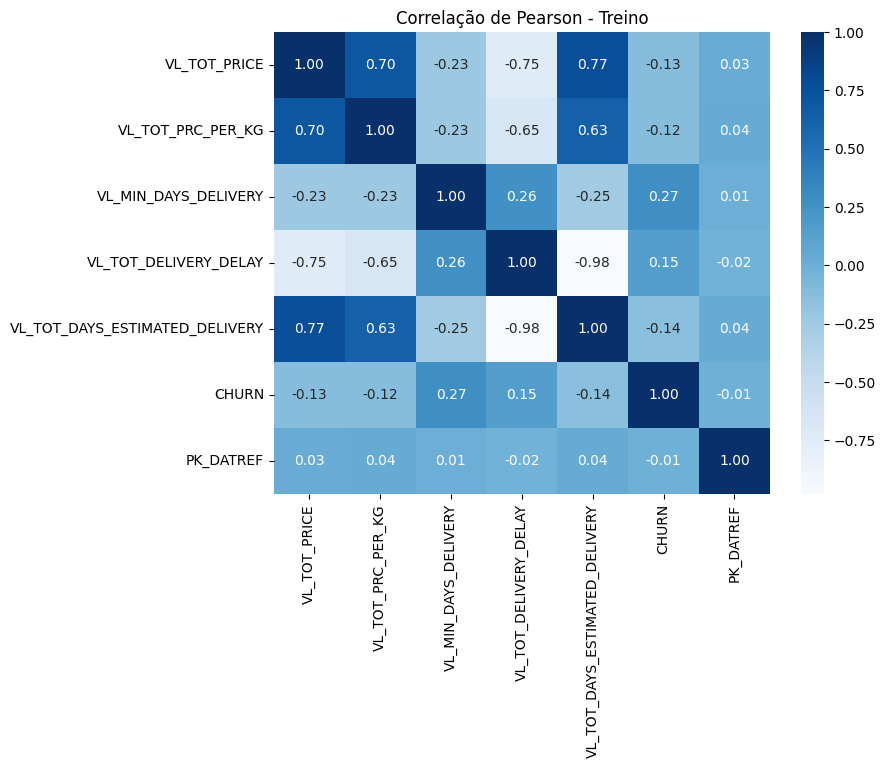

In [29]:

# Calcular a correlação de Pearson
corr_matrix = abt_treino_04.corr()

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="Blues", annot=True, fmt=".2f")
plt.title("Correlação de Pearson - Treino")
plt.show()


#### Categorization of numerical variables

 - Evaluation of numeric variables with cardinality lower than 20
 - They can be ordinal variables (they are already categorical)
 - Apply Binning process with decision tree for numeric variables with cardinality above 20

In [30]:
metadados_fs = generate_metadata(abt_treino_04,
                                          ids=['PK_DATREF'],
                                          targets=['CHURN'],
                                          orderby = 'CARDINALIDADE')

metadados_fs

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,VL_TOT_PRICE,Explicativa,0,0.0,5105,float64
1,VL_TOT_PRC_PER_KG,Explicativa,0,0.0,5063,float64
2,VL_TOT_DAYS_ESTIMATED_DELIVERY,Explicativa,0,0.0,1856,int64
3,VL_TOT_DELIVERY_DELAY,Explicativa,0,0.0,1346,float64
4,VL_MIN_DAYS_DELIVERY,Explicativa,0,0.0,54,float64
5,PK_DATREF,ID,0,0.0,6,object
6,CHURN,Target,0,0.0,2,int64


In [31]:
df_numericas = metadados_fs[(metadados_fs['CARDINALIDADE']>20) & (metadados_fs['USO_FEATURE']=='Explicativa')]
df_numericas

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,VL_TOT_PRICE,Explicativa,0,0.0,5105,float64
1,VL_TOT_PRC_PER_KG,Explicativa,0,0.0,5063,float64
2,VL_TOT_DAYS_ESTIMATED_DELIVERY,Explicativa,0,0.0,1856,int64
3,VL_TOT_DELIVERY_DELAY,Explicativa,0,0.0,1346,float64
4,VL_MIN_DAYS_DELIVERY,Explicativa,0,0.0,54,float64


In [32]:
vars_numericas = list(df_numericas.FEATURE)
vars_numericas

['VL_TOT_PRICE',
 'VL_TOT_PRC_PER_KG',
 'VL_TOT_DAYS_ESTIMATED_DELIVERY',
 'VL_TOT_DELIVERY_DELAY',
 'VL_MIN_DAYS_DELIVERY']

In [33]:
from sklearn.tree import DecisionTreeClassifier

def categorize_with_decision_tree(dataframe, n_categories, target, numeric_var):
  import numpy as np
  # Preparar os dados
  X = dataframe[[numeric_var]]
  y = dataframe[target]

  # Treinar uma árvore de decisão com profundidade máxima igual ao número de categorias desejadas
  tree = DecisionTreeClassifier(max_leaf_nodes=n_categories)
  tree.fit(X, y)

  # Predizer a categoria (folha) para cada entrada no DataFrame
  leaf_ids = tree.apply(X)

  # Criar um DataFrame temporário com as categorias (folhas), a variável numérica e o target
  temp_df = pd.DataFrame({numeric_var: dataframe[numeric_var], 'Leaf': leaf_ids, target: y})

  result = temp_df.groupby('Leaf').agg({target: 'mean', numeric_var: ['count', 'min', 'max']}).reset_index()
  result.columns = ['Leaf', 'Taxa_de_Evento', 'Volume', 'Lower_Bound', 'Upper_Bound']

  # Ajuste para garantir que os limites superior e inferior de bins adjacentes não se sobreponham
  result = result.sort_values(by='Lower_Bound')
  for i in range(1, len(result)):
      result.iloc[i, 3] = max(result.iloc[i, 3], result.iloc[i-1, 4])

  # Definir o limite inferior do primeiro bin como -inf e o limite superior do último bin como inf
  result.iloc[0, 3] = -np.inf
  result.iloc[-1, 4] = np.inf

  return result


def apply_tree_bins(data, transformation_df, numeric_var):

  import numpy as np
  df_copy = data.copy()

  # Obtenha os limites superiores e ordene-os
  upper_bounds = transformation_df['Upper_Bound'].sort_values().values

  # Use numpy.digitize para determinar a qual bin cada valor pertence
  df_copy[f"TFT_{numeric_var}"] = np.digitize(df_copy[numeric_var].values, upper_bounds)
  df_copy.drop(axis=1,columns=[numeric_var],inplace=True)

  return df_copy

In [34]:
abt_treino_04.head()

,VL_TOT_PRICE,VL_TOT_PRC_PER_KG,VL_MIN_DAYS_DELIVERY,VL_TOT_DELIVERY_DELAY,VL_TOT_DAYS_ESTIMATED_DELIVERY,CHURN,PK_DATREF
3322,916.02,75.85,10.0,-23.0,34,0,201709
4033,2748.06,227.55,9.0,-49.0,81,1,201710
3323,18409.61,1524.17,3.0,-1860.0,3382,0,201709
4034,19911.26,1637.23,3.0,-2017.0,3631,0,201710
4795,21288.31,1730.05,3.0,-2009.0,3853,0,201711


#### Analyzing the variable VL_TOT_PRC_PER_KG

In [35]:
result = categorize_with_decision_tree(abt_treino_04, n_categories=4, target='CHURN', numeric_var='VL_TOT_PRC_PER_KG')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
0,3,0.340802,848,-inf,217.68
1,4,0.216283,1216,217.70,847.84
2,5,0.110000,1500,849.34,3856.66
3,6,0.043147,1576,3858.57,inf


In [36]:
abt_treino_05 = apply_tree_bins(abt_treino_04, result, numeric_var='VL_TOT_PRC_PER_KG')
abt_treino_05.head()

,VL_TOT_PRICE,VL_MIN_DAYS_DELIVERY,VL_TOT_DELIVERY_DELAY,VL_TOT_DAYS_ESTIMATED_DELIVERY,CHURN,PK_DATREF,TFT_VL_TOT_PRC_PER_KG
3322,916.02,10.0,-23.0,34,0,201709,0
4033,2748.06,9.0,-49.0,81,1,201710,1
3323,18409.61,3.0,-1860.0,3382,0,201709,2
4034,19911.26,3.0,-2017.0,3631,0,201710,2
4795,21288.31,3.0,-2009.0,3853,0,201711,2


In [37]:
abt_oot_04 = apply_tree_bins(abt_oot_03, result, numeric_var='VL_TOT_PRC_PER_KG')

In [38]:
abt_treino_05.TFT_VL_TOT_PRC_PER_KG.unique()

array([0, 1, 2, 3])

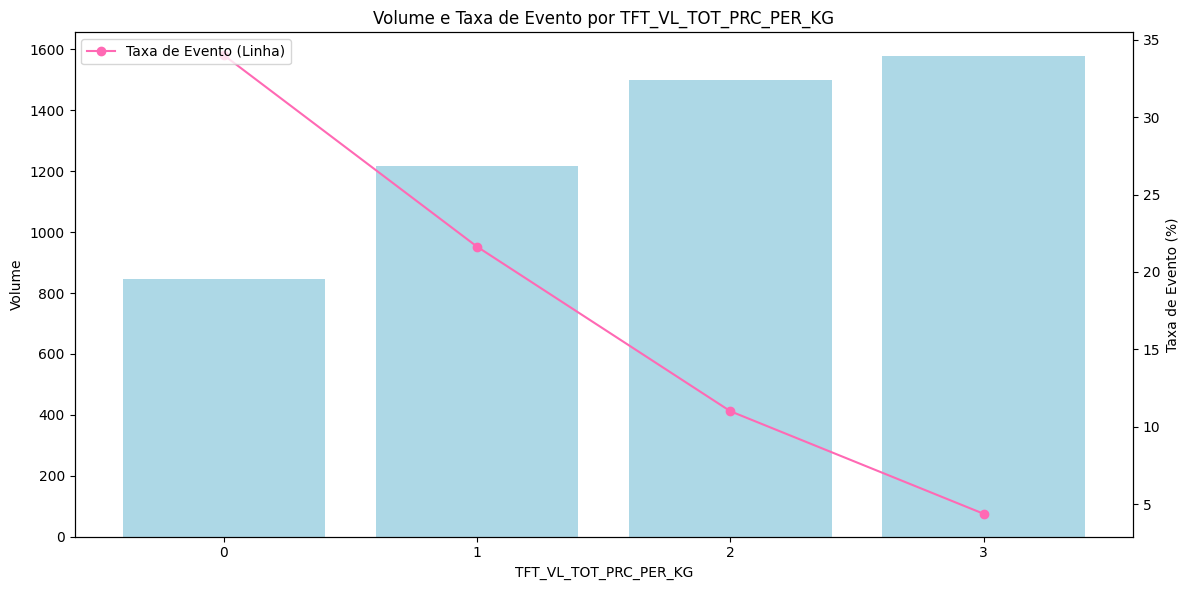

In [39]:
result = analyze_variable(abt_treino_05, 'TFT_VL_TOT_PRC_PER_KG', "CHURN")

In [40]:
result

,TFT_VL_TOT_PRC_PER_KG,Taxa_de_Evento,Volume
0,0,0.340024,847
1,1,0.216283,1216
2,2,0.110000,1500
3,3,0.043754,1577


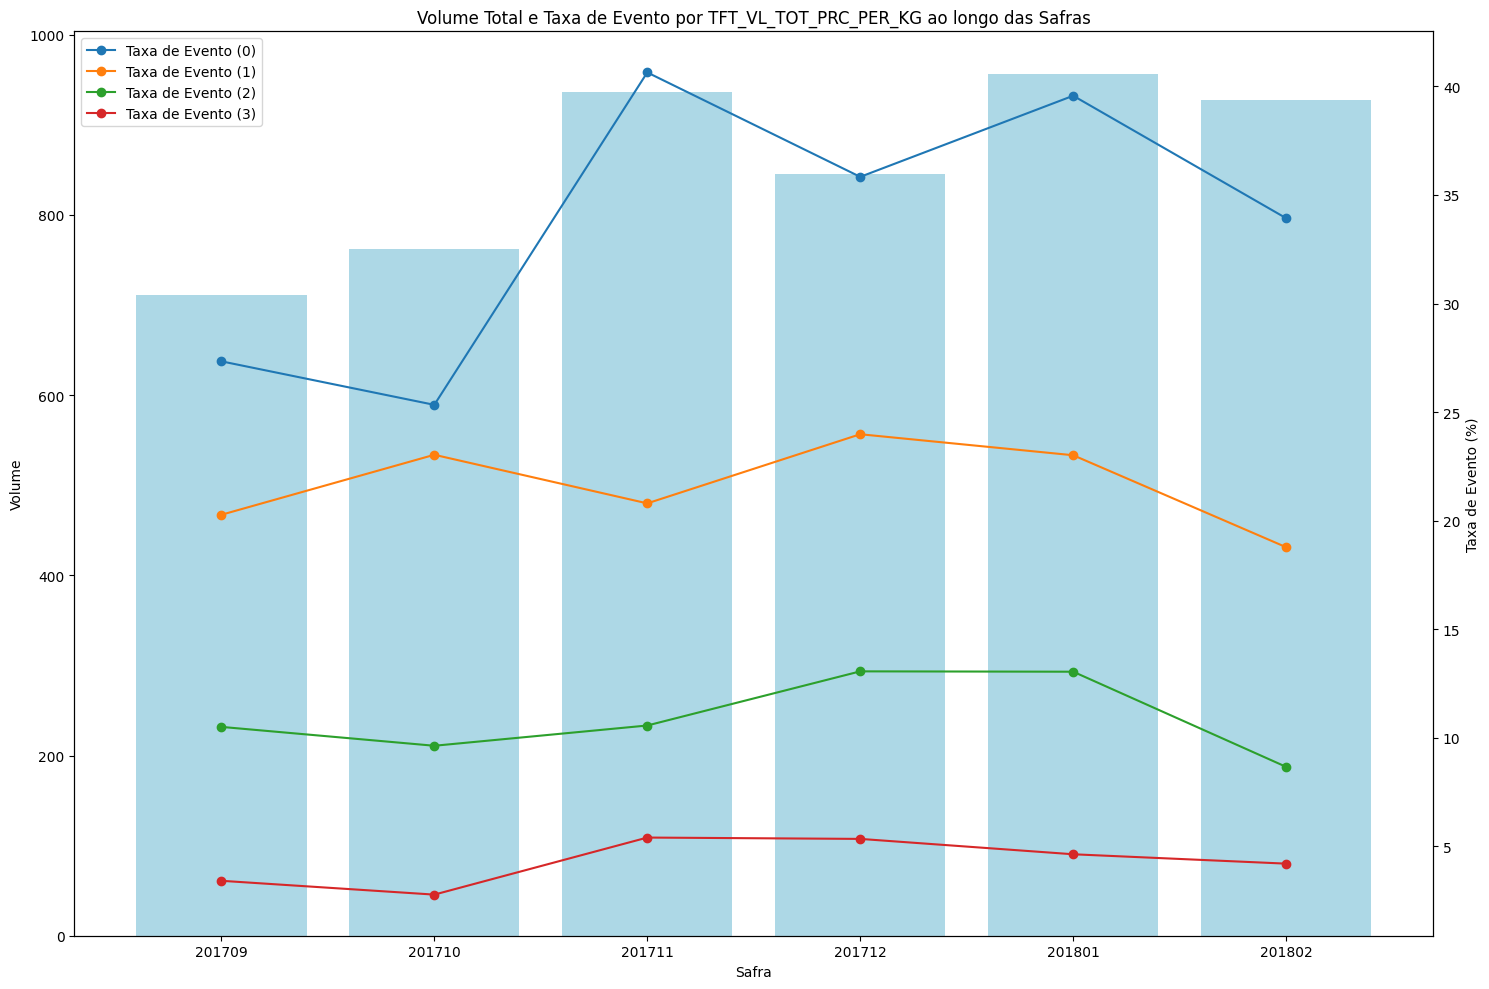

In [41]:
plot_by_safra(abt_treino_05, "CHURN", 'TFT_VL_TOT_PRC_PER_KG', "PK_DATREF")

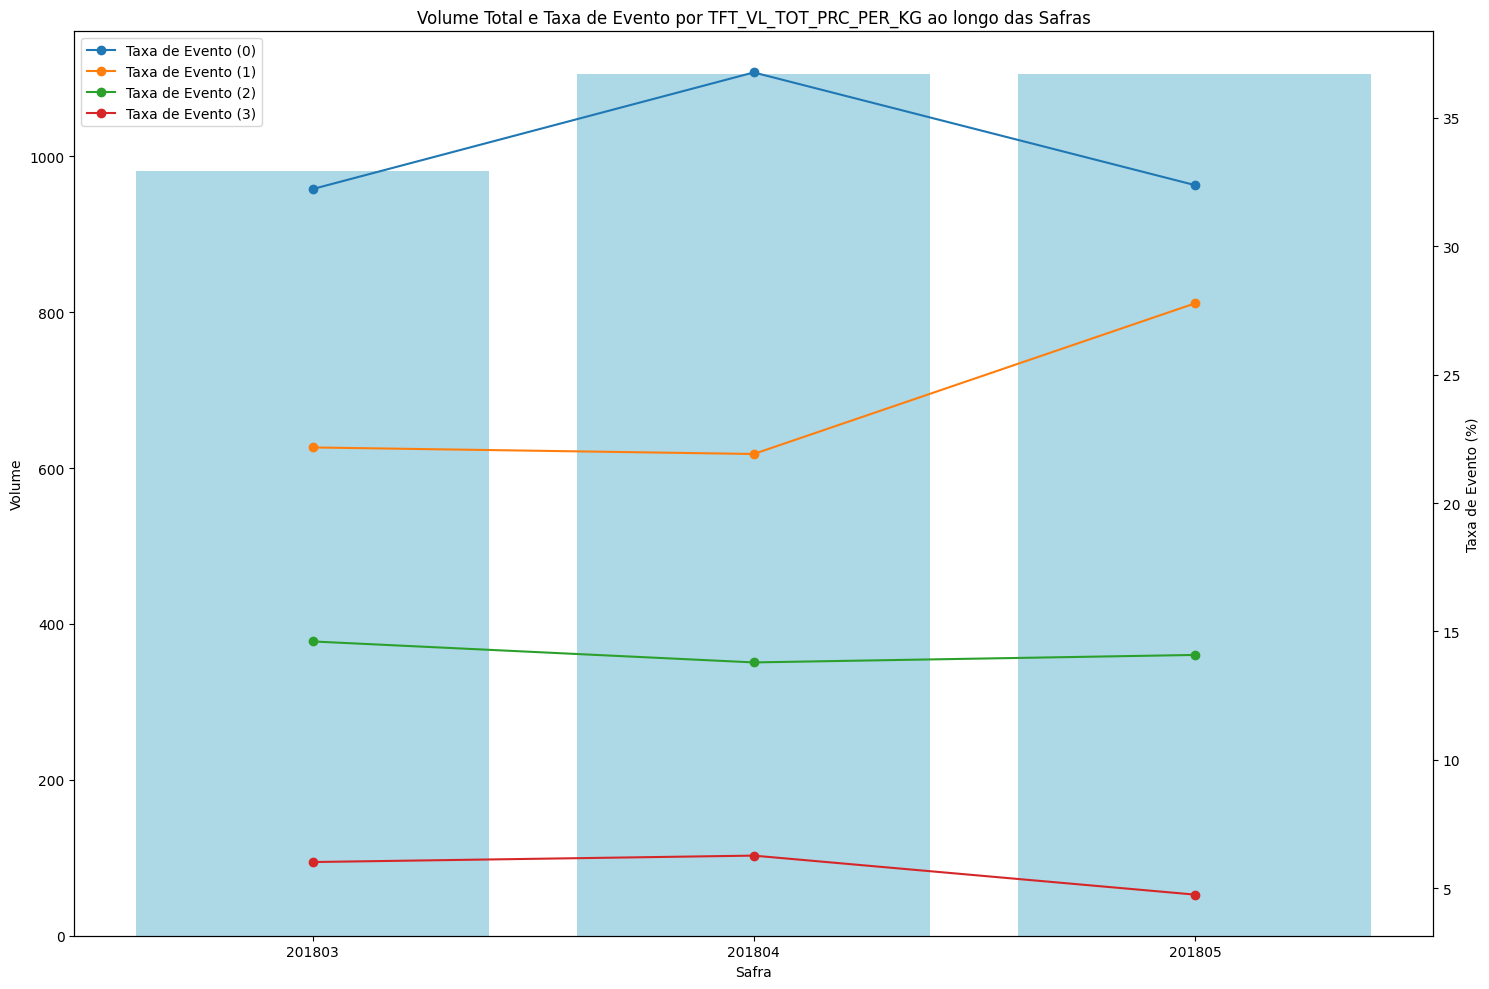

In [42]:
plot_by_safra(abt_oot_04, "CHURN", 'TFT_VL_TOT_PRC_PER_KG', "PK_DATREF")

In [43]:
abt_treino_05["TFT_VL_TOT_PRC_PER_KG"] = pd.to_numeric(abt_treino_05["TFT_VL_TOT_PRC_PER_KG"], errors='coerce').astype('Int64')
abt_oot_04["TFT_VL_TOT_PRC_PER_KG"] = pd.to_numeric(abt_oot_04["TFT_VL_TOT_PRC_PER_KG"], errors='coerce').astype('Int64')

In [44]:
abt_treino_05.dtypes

VL_TOT_PRICE                      float64
VL_MIN_DAYS_DELIVERY              float64
VL_TOT_DELIVERY_DELAY             float64
VL_TOT_DAYS_ESTIMATED_DELIVERY      int64
CHURN                               int64
PK_DATREF                          object
TFT_VL_TOT_PRC_PER_KG               Int64
dtype: object

In [45]:
vars_numericas

['VL_TOT_PRICE',
 'VL_TOT_PRC_PER_KG',
 'VL_TOT_DAYS_ESTIMATED_DELIVERY',
 'VL_TOT_DELIVERY_DELAY',
 'VL_MIN_DAYS_DELIVERY']

#### Analyzing the variable VL_TOT_PRICE

In [46]:
result = categorize_with_decision_tree(abt_treino_05, n_categories=4, target='CHURN', numeric_var='VL_TOT_PRICE')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
0,3,0.377193,570,-inf,206.82
1,4,0.242502,1167,207.67,864.88
2,5,0.142206,1097,865.18,2115.70
3,6,0.056808,2306,2117.48,inf


In [47]:
abt_treino_07 = apply_tree_bins(abt_treino_05, result, numeric_var='VL_TOT_PRICE')
abt_oot_07 = apply_tree_bins(abt_oot_04, result, numeric_var='VL_TOT_PRICE')
abt_treino_07.head()

,VL_MIN_DAYS_DELIVERY,VL_TOT_DELIVERY_DELAY,VL_TOT_DAYS_ESTIMATED_DELIVERY,CHURN,PK_DATREF,TFT_VL_TOT_PRC_PER_KG,TFT_VL_TOT_PRICE
3322,10.0,-23.0,34,0,201709,0,2
4033,9.0,-49.0,81,1,201710,1,3
3323,3.0,-1860.0,3382,0,201709,2,3
4034,3.0,-2017.0,3631,0,201710,2,3
4795,3.0,-2009.0,3853,0,201711,2,3


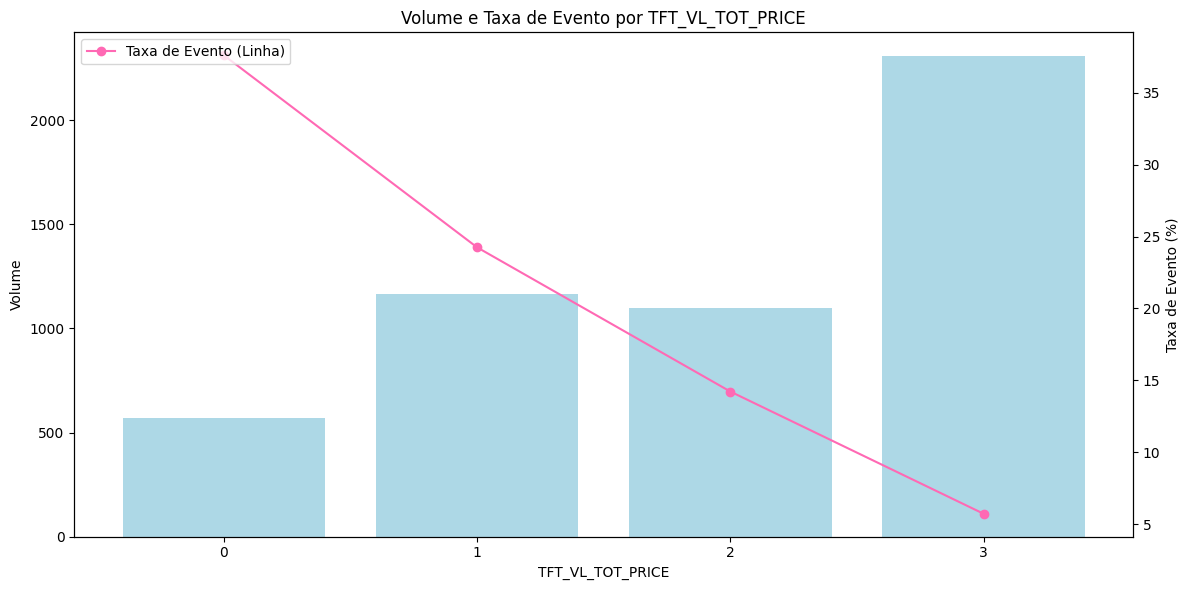

In [48]:
result = analyze_variable(abt_treino_07, 'TFT_VL_TOT_PRICE', "CHURN")

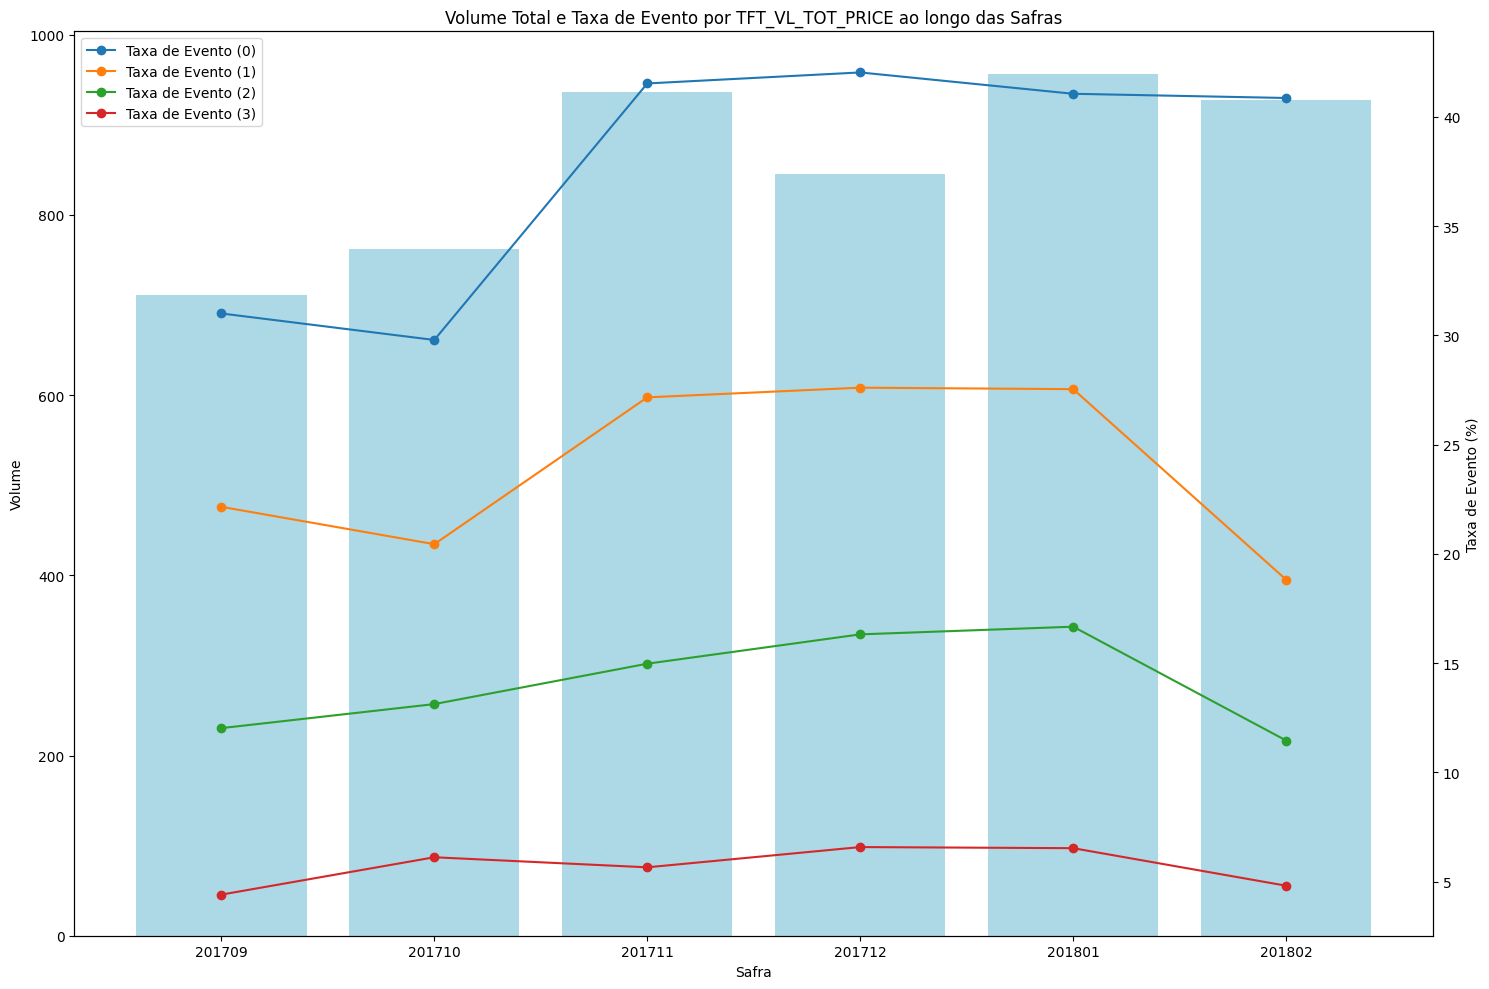

In [49]:
plot_by_safra(abt_treino_07, "CHURN", 'TFT_VL_TOT_PRICE', "PK_DATREF")

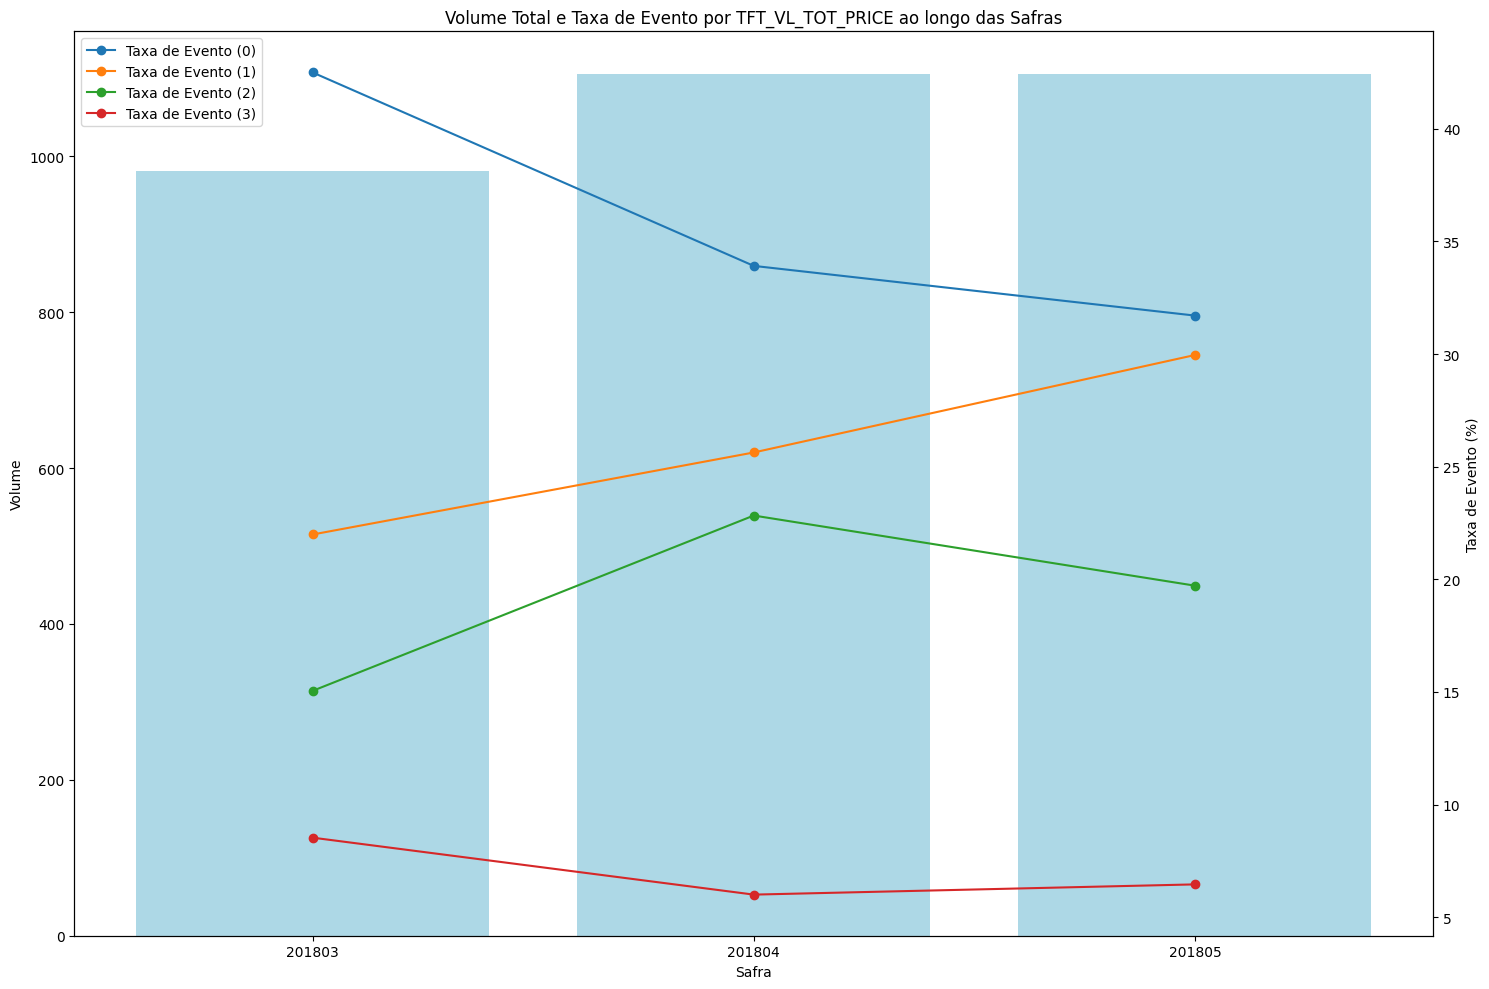

In [50]:
plot_by_safra(abt_oot_07, "CHURN", 'TFT_VL_TOT_PRICE', "PK_DATREF")

In [51]:
vars_numericas

['VL_TOT_PRICE',
 'VL_TOT_PRC_PER_KG',
 'VL_TOT_DAYS_ESTIMATED_DELIVERY',
 'VL_TOT_DELIVERY_DELAY',
 'VL_MIN_DAYS_DELIVERY']

In [52]:
abt_treino_07["TFT_VL_TOT_PRICE"] = pd.to_numeric(abt_treino_07["TFT_VL_TOT_PRICE"], errors='coerce').astype('Int64')
abt_oot_07["TFT_VL_TOT_PRICE"] = pd.to_numeric(abt_oot_07["TFT_VL_TOT_PRICE"], errors='coerce').astype('Int64')

In [53]:
abt_treino_07.dtypes

VL_MIN_DAYS_DELIVERY              float64
VL_TOT_DELIVERY_DELAY             float64
VL_TOT_DAYS_ESTIMATED_DELIVERY      int64
CHURN                               int64
PK_DATREF                          object
TFT_VL_TOT_PRC_PER_KG               Int64
TFT_VL_TOT_PRICE                    Int64
dtype: object

In [54]:
vars_numericas

['VL_TOT_PRICE',
 'VL_TOT_PRC_PER_KG',
 'VL_TOT_DAYS_ESTIMATED_DELIVERY',
 'VL_TOT_DELIVERY_DELAY',
 'VL_MIN_DAYS_DELIVERY']

#### Analyzing the variable VL_MAX_PRICE

In [55]:
result = categorize_with_decision_tree(abt_treino_07, n_categories=4, target='CHURN', numeric_var='VL_TOT_DAYS_ESTIMATED_DELIVERY')
result

/tmp/ipykernel_29315/2581762271.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-inf' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.iloc[0, 3] = -np.inf
/tmp/ipykernel_29315/2581762271.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'inf' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.iloc[-1, 4] = np.inf


,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
2,5,0.386399,647,-inf,52.0
3,6,0.276049,739,53.0,120.0
0,3,0.180039,1022,121.0,272.0
1,4,0.053807,2732,273.0,inf


In [56]:
abt_treino_08 = apply_tree_bins(abt_treino_07, result, numeric_var='VL_TOT_DAYS_ESTIMATED_DELIVERY')
abt_oot_08 = apply_tree_bins(abt_oot_07, result, numeric_var='VL_TOT_DAYS_ESTIMATED_DELIVERY')
abt_treino_08.head()

,VL_MIN_DAYS_DELIVERY,VL_TOT_DELIVERY_DELAY,CHURN,PK_DATREF,TFT_VL_TOT_PRC_PER_KG,TFT_VL_TOT_PRICE,TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY
3322,10.0,-23.0,0,201709,0,2,0
4033,9.0,-49.0,1,201710,1,3,1
3323,3.0,-1860.0,0,201709,2,3,3
4034,3.0,-2017.0,0,201710,2,3,3
4795,3.0,-2009.0,0,201711,2,3,3


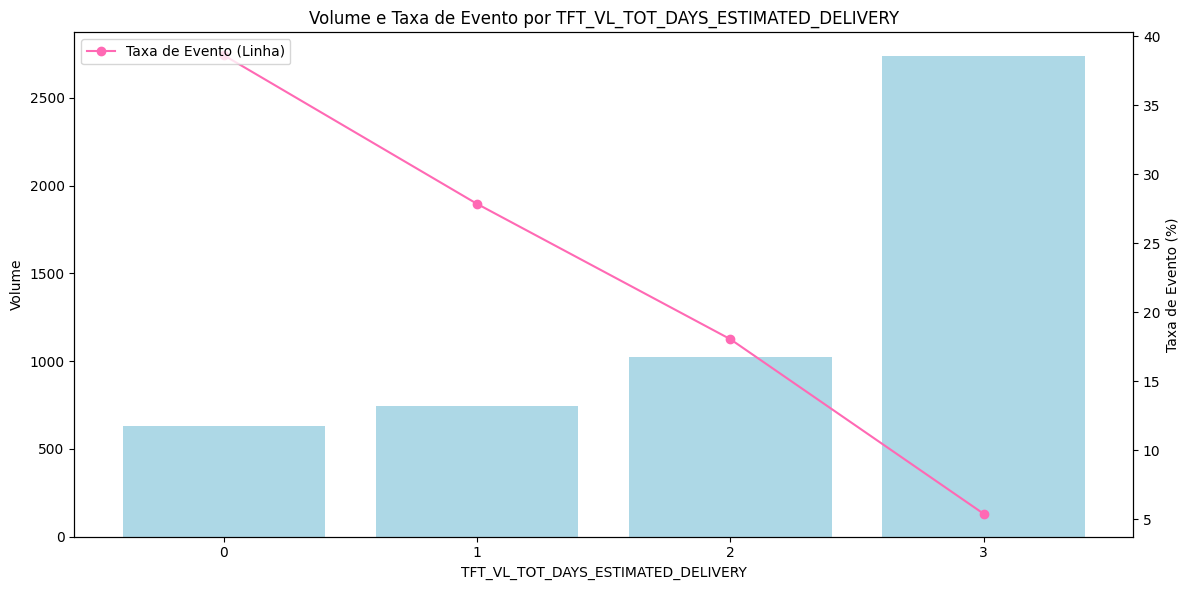

In [57]:
result = analyze_variable(abt_treino_08, 'TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY', "CHURN")

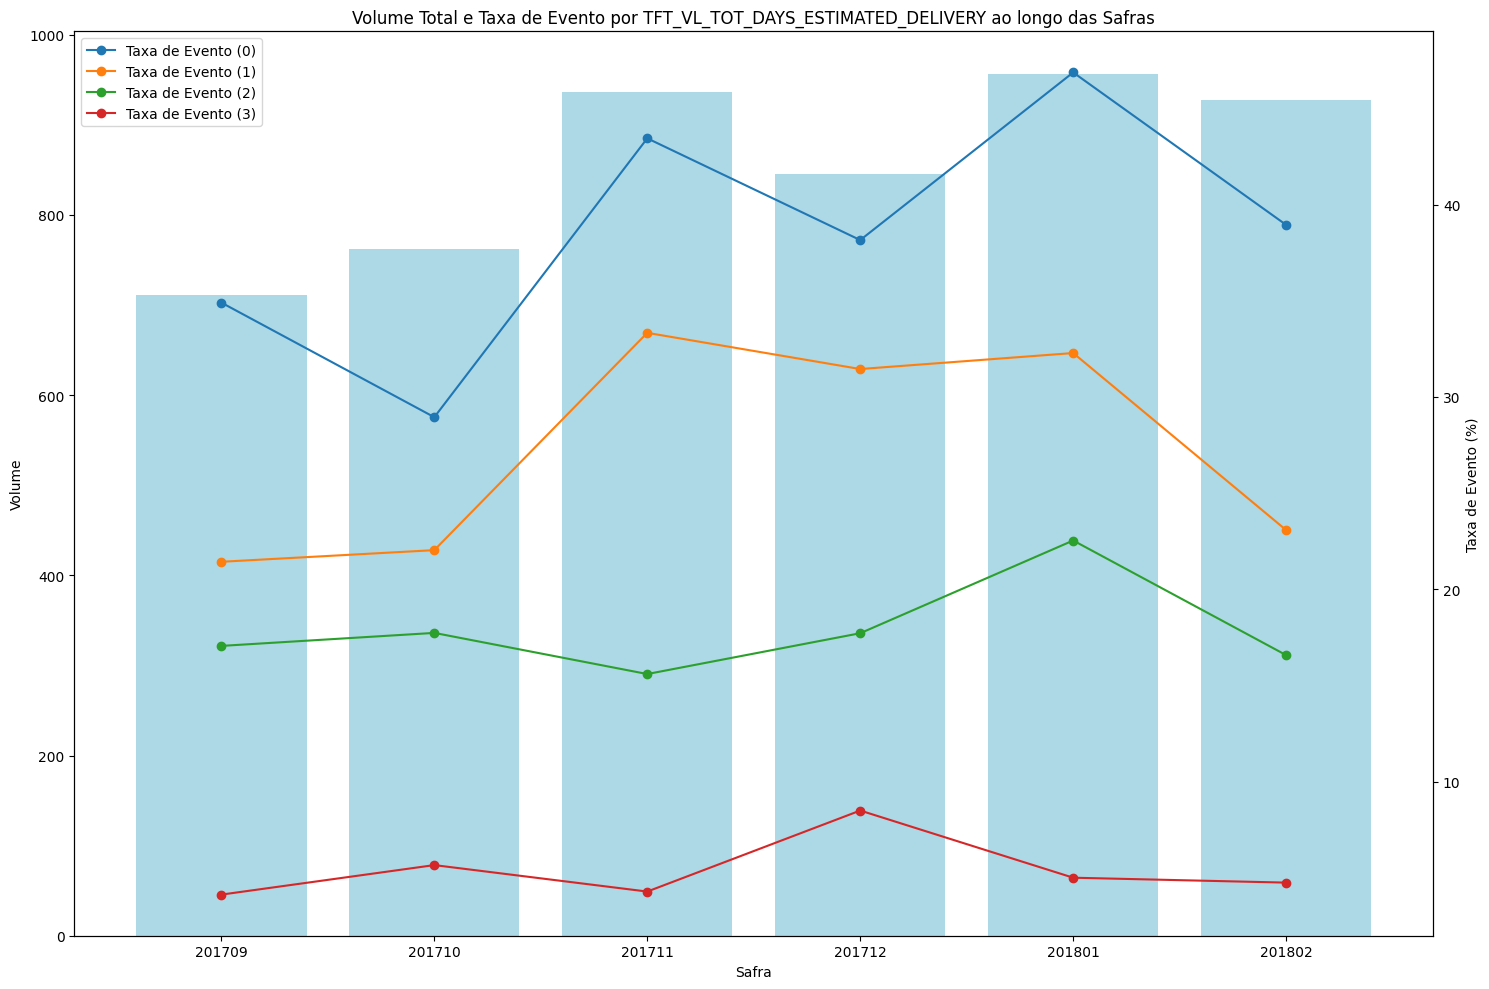

In [58]:
plot_by_safra(abt_treino_08, "CHURN", 'TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY', "PK_DATREF")

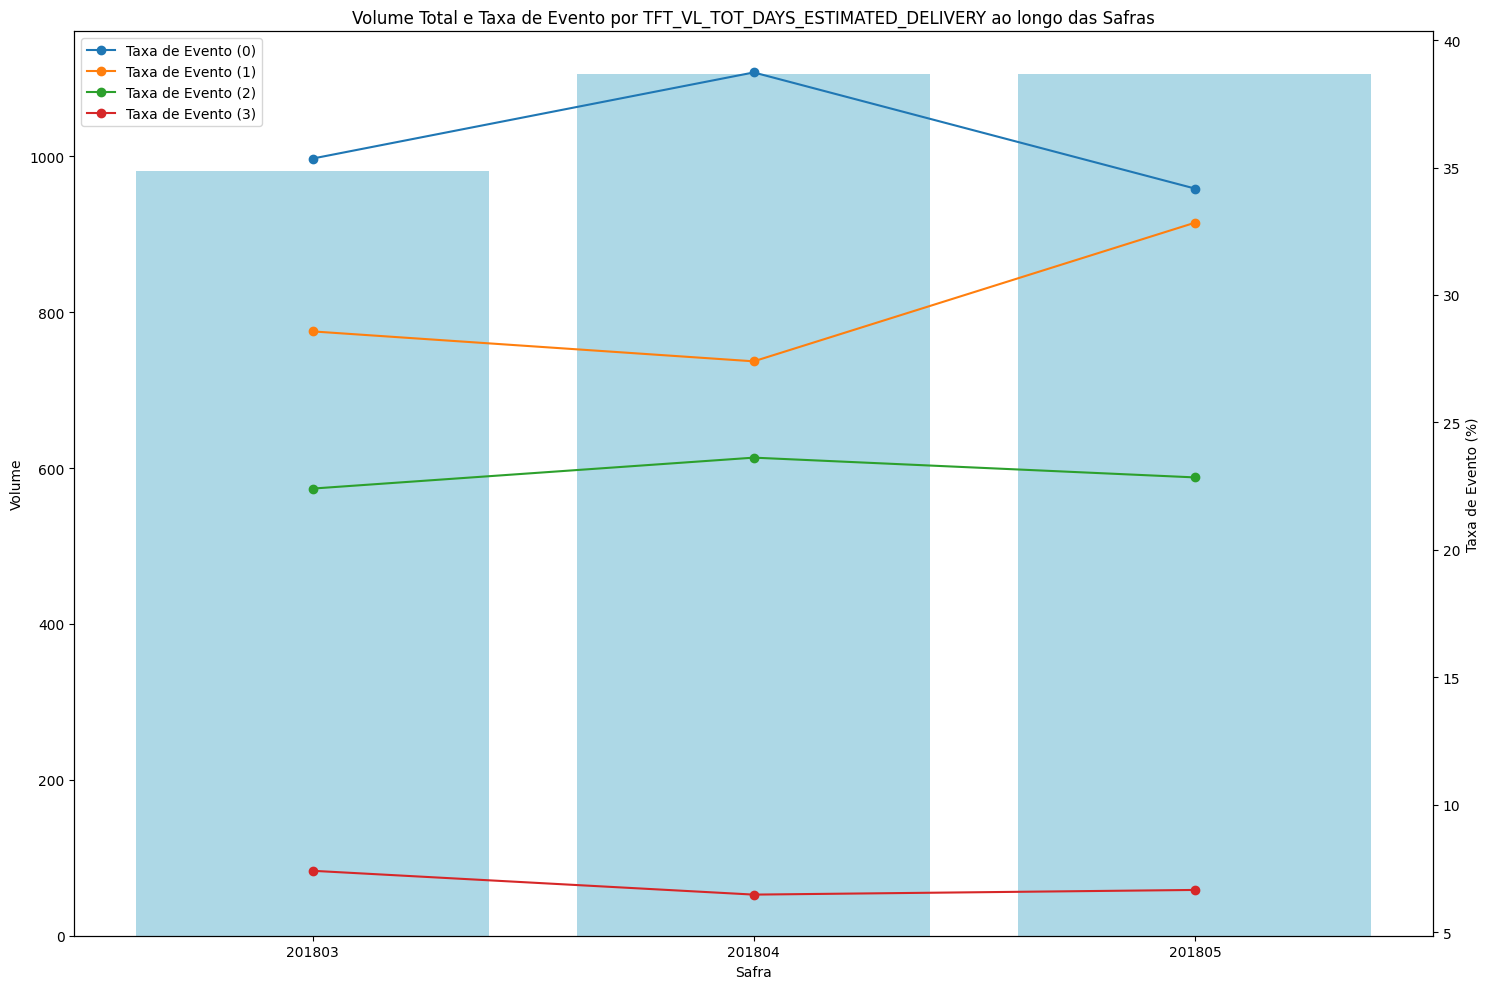

In [59]:
plot_by_safra(abt_oot_08, "CHURN", 'TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY', "PK_DATREF")

In [60]:
abt_treino_08["TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY"] = pd.to_numeric(abt_treino_08["TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY"], errors='coerce').astype('Int64')
abt_oot_08["TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY"] = pd.to_numeric(abt_oot_08["TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY"], errors='coerce').astype('Int64')

In [61]:
abt_treino_08.head()

,VL_MIN_DAYS_DELIVERY,VL_TOT_DELIVERY_DELAY,CHURN,PK_DATREF,TFT_VL_TOT_PRC_PER_KG,TFT_VL_TOT_PRICE,TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY
3322,10.0,-23.0,0,201709,0,2,0
4033,9.0,-49.0,1,201710,1,3,1
3323,3.0,-1860.0,0,201709,2,3,3
4034,3.0,-2017.0,0,201710,2,3,3
4795,3.0,-2009.0,0,201711,2,3,3


In [62]:
vars_numericas

['VL_TOT_PRICE',
 'VL_TOT_PRC_PER_KG',
 'VL_TOT_DAYS_ESTIMATED_DELIVERY',
 'VL_TOT_DELIVERY_DELAY',
 'VL_MIN_DAYS_DELIVERY']

#### Analyzing the variable VL_MIN_PRICE

In [63]:
result = categorize_with_decision_tree(abt_treino_08, n_categories=4, target='CHURN', numeric_var='VL_TOT_DELIVERY_DELAY')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
2,5,0.039790,2287,-inf,-184.0
3,6,0.147346,923,-183.0,-90.0
0,3,0.238619,1274,-89.0,-21.0
1,4,0.387195,656,-20.0,inf


In [64]:
abt_treino_09 = apply_tree_bins(abt_treino_08, result, numeric_var='VL_TOT_DELIVERY_DELAY')
abt_oot_09 = apply_tree_bins(abt_oot_08, result, numeric_var='VL_TOT_DELIVERY_DELAY')
abt_treino_09.head()

,VL_MIN_DAYS_DELIVERY,CHURN,PK_DATREF,TFT_VL_TOT_PRC_PER_KG,TFT_VL_TOT_PRICE,TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY,TFT_VL_TOT_DELIVERY_DELAY
3322,10.0,0,201709,0,2,0,2
4033,9.0,1,201710,1,3,1,2
3323,3.0,0,201709,2,3,3,0
4034,3.0,0,201710,2,3,3,0
4795,3.0,0,201711,2,3,3,0


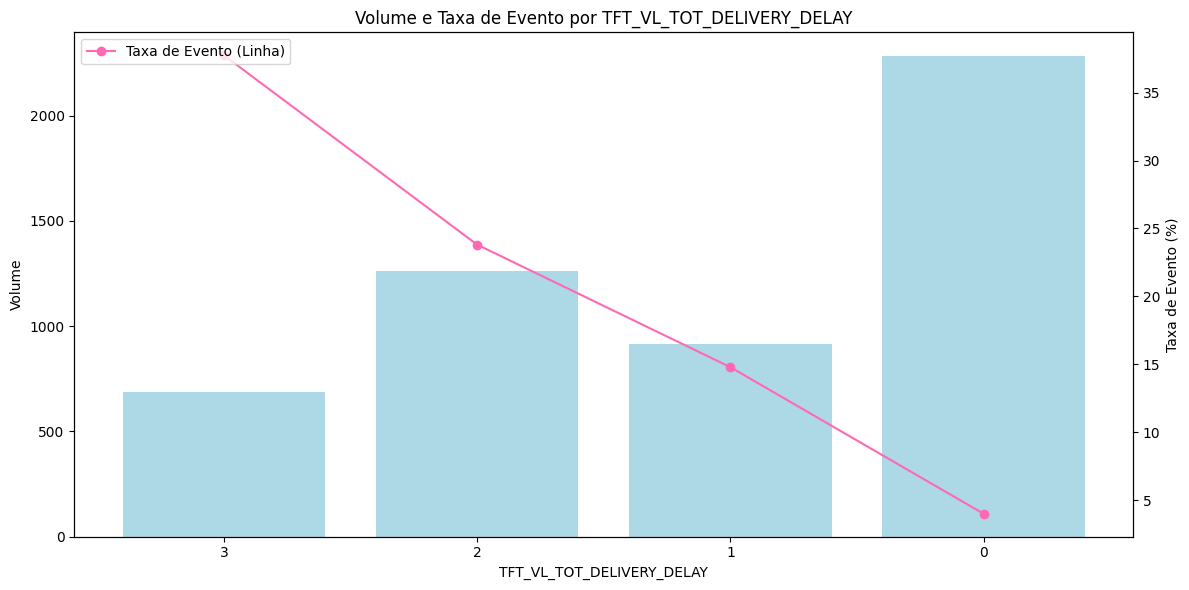

In [65]:
result = analyze_variable(abt_treino_09, 'TFT_VL_TOT_DELIVERY_DELAY', "CHURN")

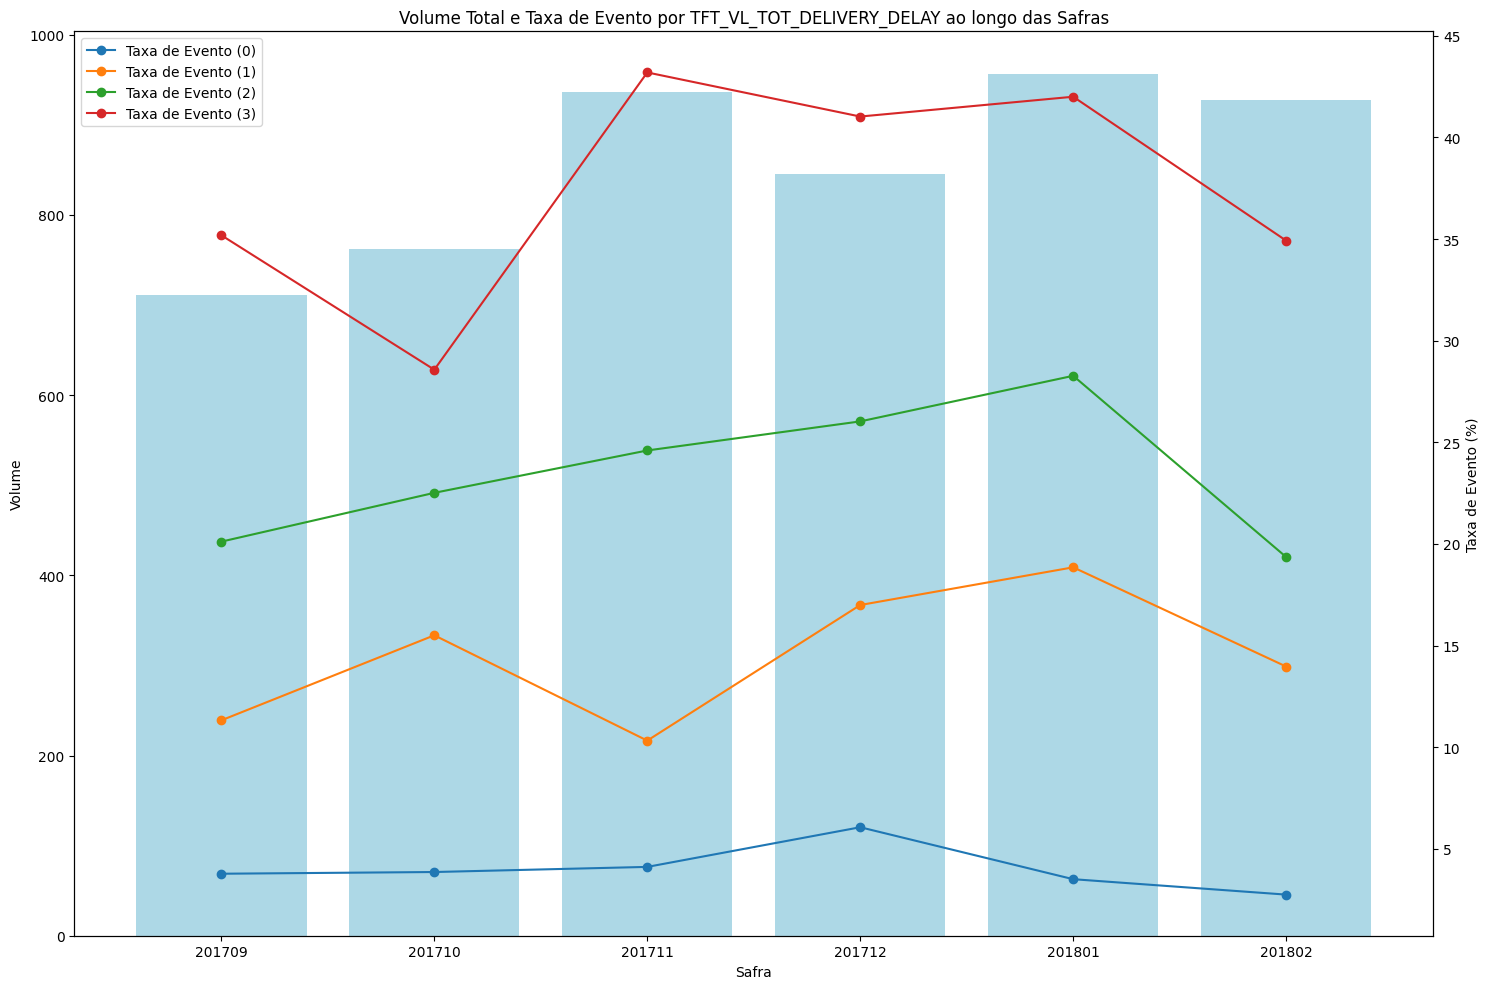

In [66]:
plot_by_safra(abt_treino_09, "CHURN", 'TFT_VL_TOT_DELIVERY_DELAY', "PK_DATREF")

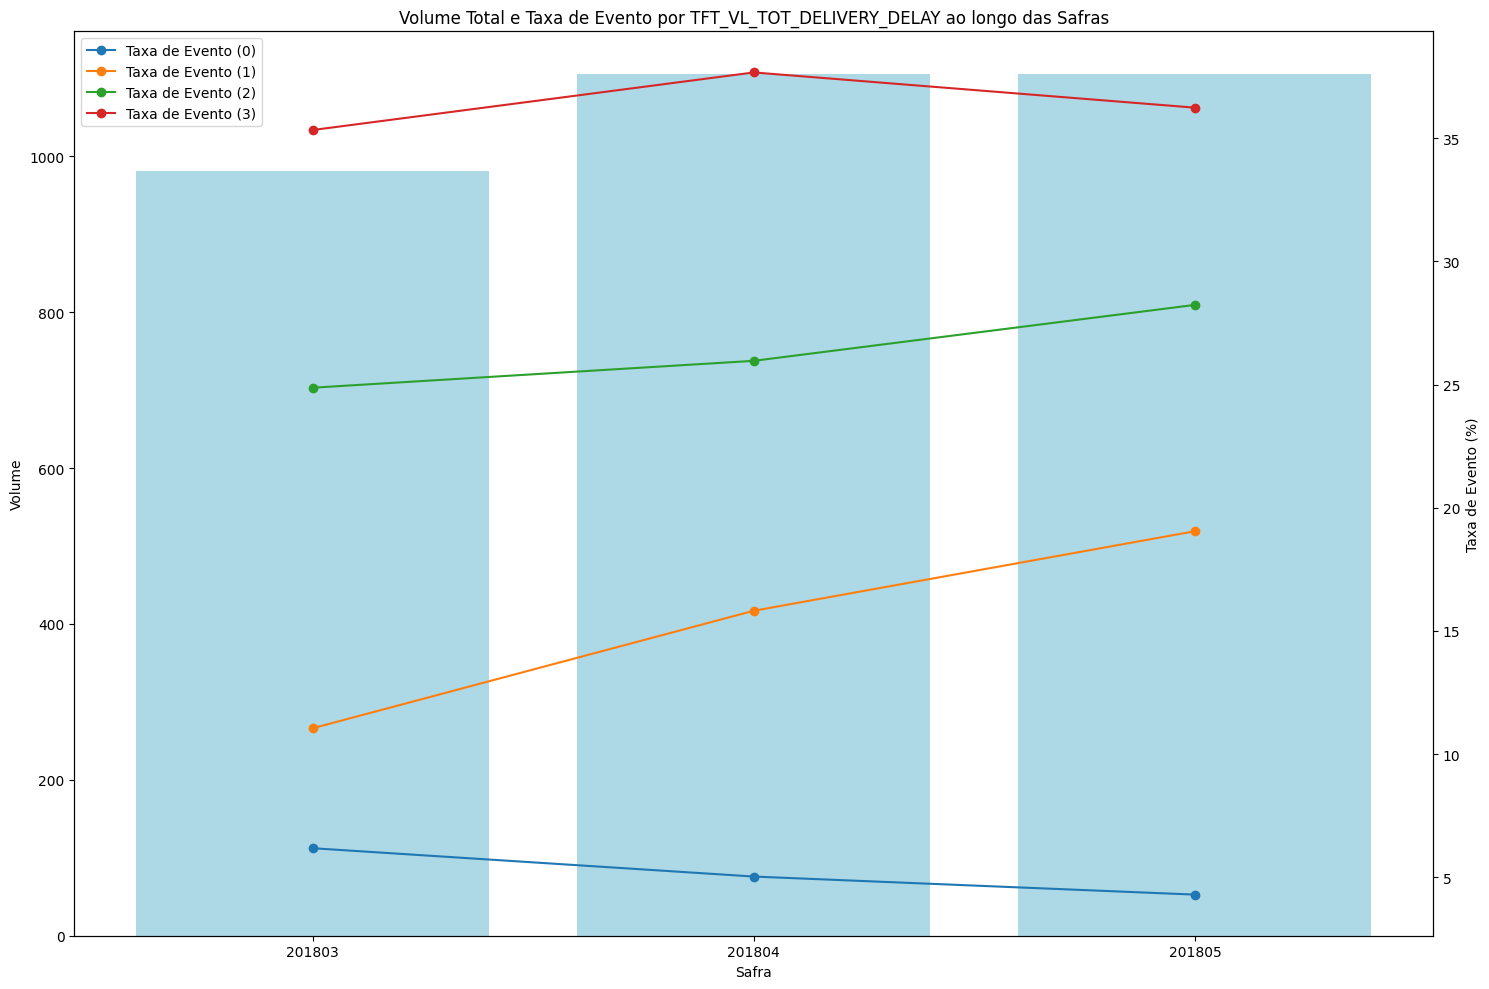

In [67]:
plot_by_safra(abt_oot_09, "CHURN", 'TFT_VL_TOT_DELIVERY_DELAY', "PK_DATREF")

In [68]:
abt_treino_09["TFT_VL_TOT_DELIVERY_DELAY"] = pd.to_numeric(abt_treino_09["TFT_VL_TOT_DELIVERY_DELAY"], errors='coerce').astype('Int64')
abt_oot_09["TFT_VL_TOT_DELIVERY_DELAY"] = pd.to_numeric(abt_oot_09["TFT_VL_TOT_DELIVERY_DELAY"], errors='coerce').astype('Int64')

In [69]:
vars_numericas

['VL_TOT_PRICE',
 'VL_TOT_PRC_PER_KG',
 'VL_TOT_DAYS_ESTIMATED_DELIVERY',
 'VL_TOT_DELIVERY_DELAY',
 'VL_MIN_DAYS_DELIVERY']

#### Analyzing the variable VL_TOT_DAYS_ESTIMATED_DELIVERY

In [70]:
result = categorize_with_decision_tree(abt_treino_09, n_categories=3, target='CHURN', numeric_var='VL_MIN_DAYS_DELIVERY')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
1,3,0.086885,3050,-inf,4.0
2,4,0.194679,1541,5.0,10.0
0,2,0.400729,549,11.0,inf


In [71]:
abt_treino_10 = apply_tree_bins(abt_treino_09, result, numeric_var='VL_MIN_DAYS_DELIVERY')
abt_oot_10 = apply_tree_bins(abt_oot_09, result, numeric_var='VL_MIN_DAYS_DELIVERY')
abt_treino_10.head()

,CHURN,PK_DATREF,TFT_VL_TOT_PRC_PER_KG,TFT_VL_TOT_PRICE,TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY,TFT_VL_TOT_DELIVERY_DELAY,TFT_VL_MIN_DAYS_DELIVERY
3322,0,201709,0,2,0,2,2
4033,1,201710,1,3,1,2,1
3323,0,201709,2,3,3,0,0
4034,0,201710,2,3,3,0,0
4795,0,201711,2,3,3,0,0


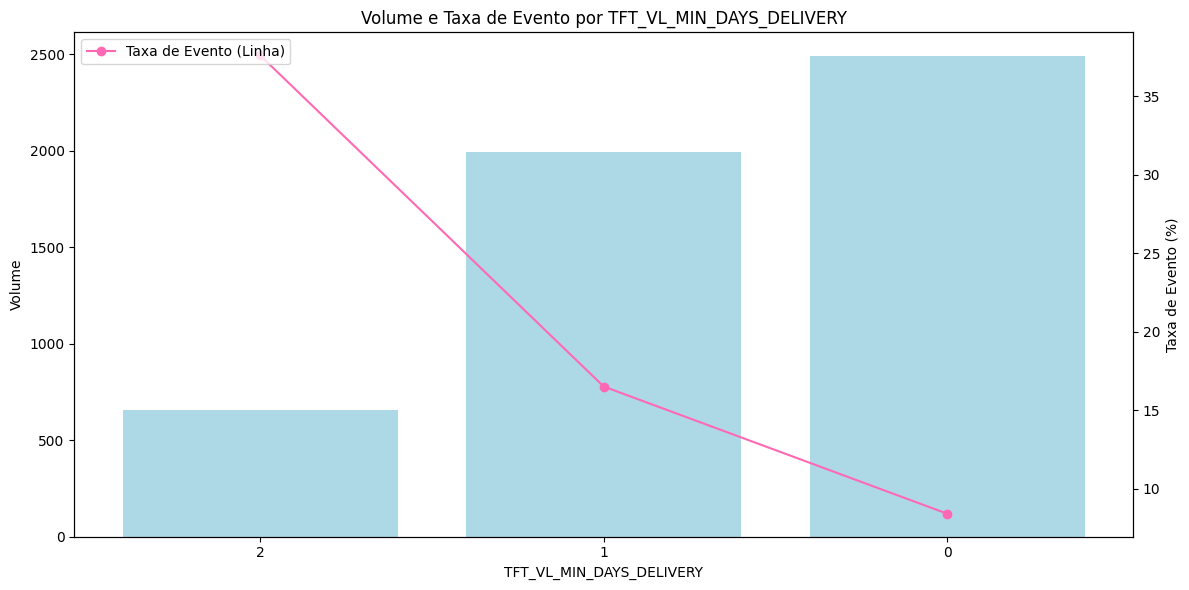

In [72]:
result = analyze_variable(abt_treino_10, 'TFT_VL_MIN_DAYS_DELIVERY', "CHURN")

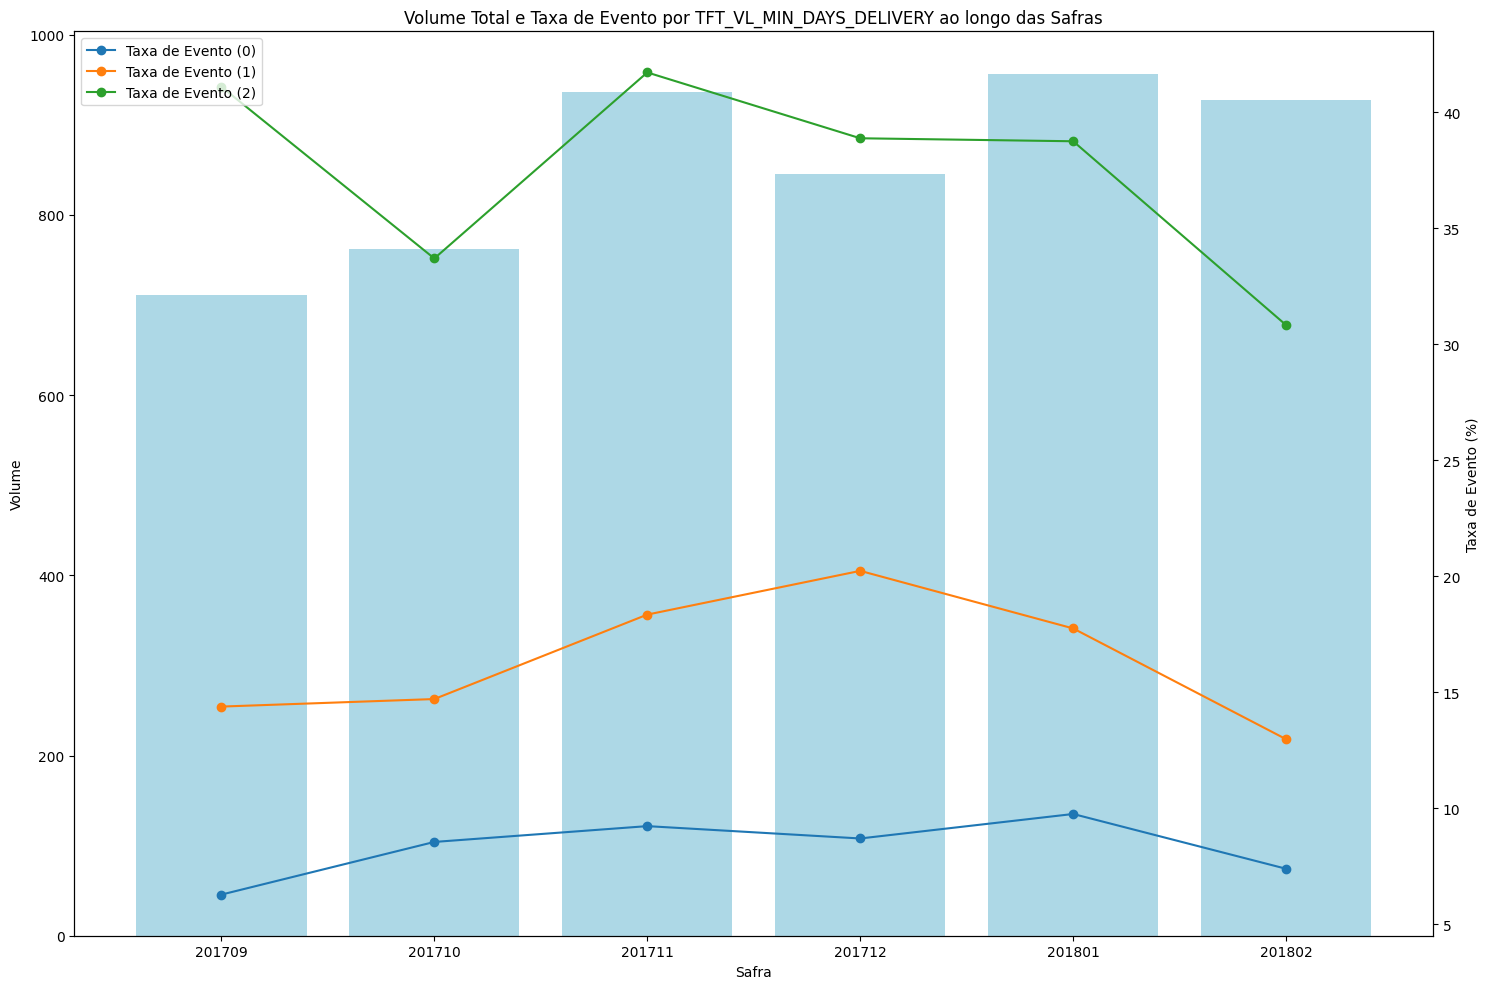

In [73]:
plot_by_safra(abt_treino_10, "CHURN", 'TFT_VL_MIN_DAYS_DELIVERY', "PK_DATREF")

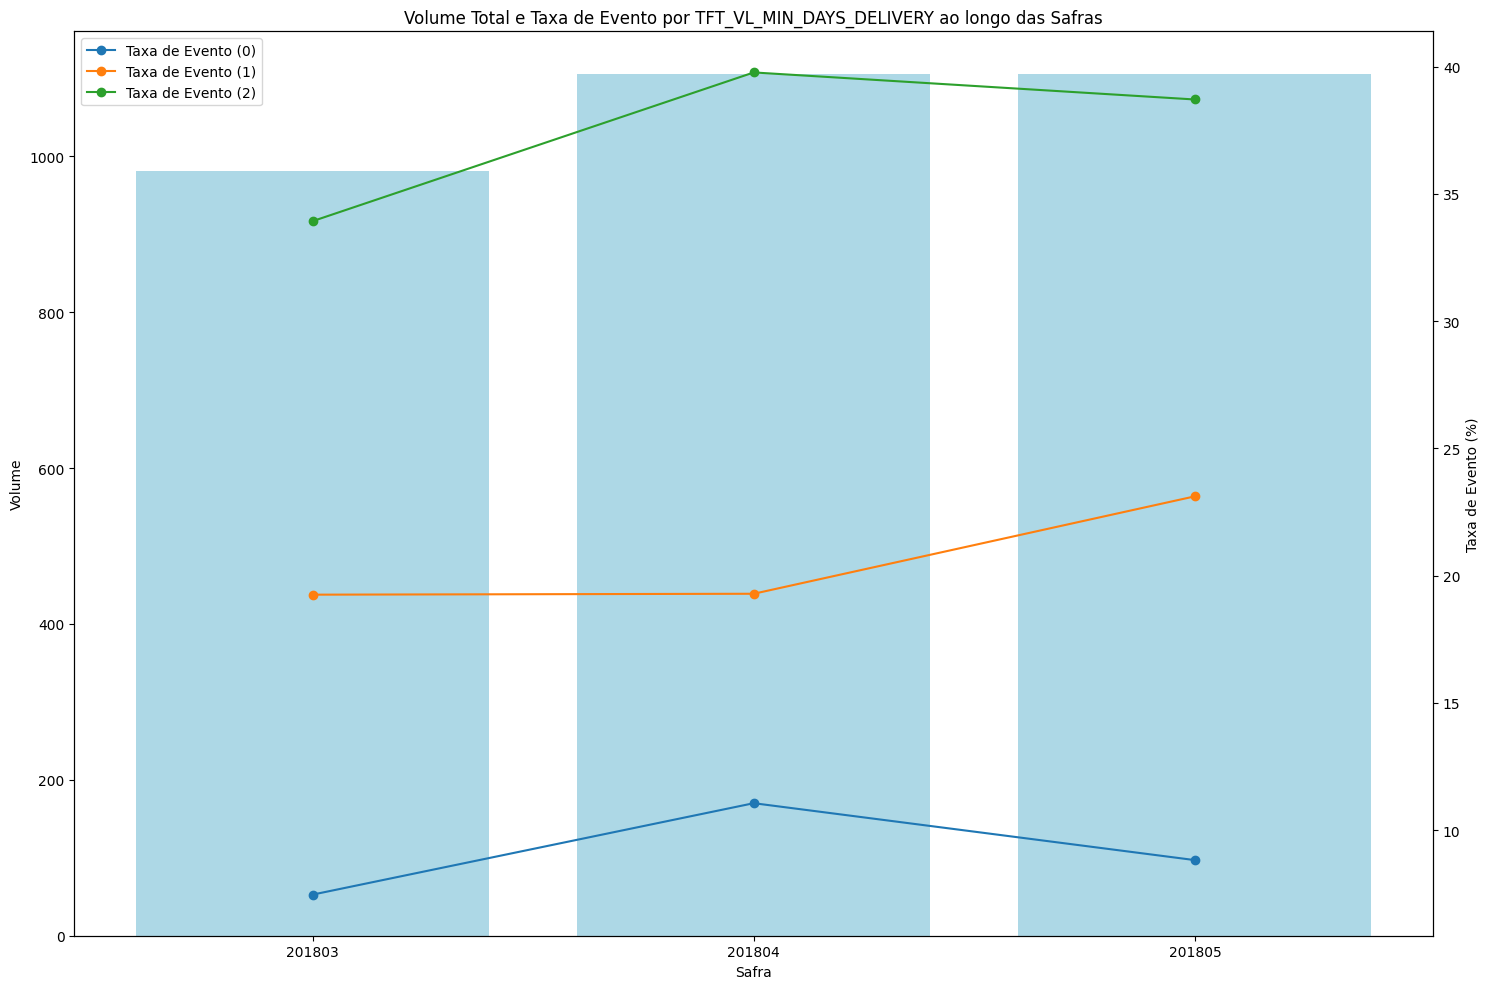

In [74]:
plot_by_safra(abt_oot_10, "CHURN", 'TFT_VL_MIN_DAYS_DELIVERY', "PK_DATREF")

In [75]:
abt_treino_10["TFT_VL_MIN_DAYS_DELIVERY"] = pd.to_numeric(abt_treino_10["TFT_VL_MIN_DAYS_DELIVERY"], errors='coerce').astype('Int64')
abt_oot_10["TFT_VL_MIN_DAYS_DELIVERY"] = pd.to_numeric(abt_oot_10["TFT_VL_MIN_DAYS_DELIVERY"], errors='coerce').astype('Int64')

In [76]:
abt_treino_10.head()

,CHURN,PK_DATREF,TFT_VL_TOT_PRC_PER_KG,TFT_VL_TOT_PRICE,TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY,TFT_VL_TOT_DELIVERY_DELAY,TFT_VL_MIN_DAYS_DELIVERY
3322,0,201709,0,2,0,2,2
4033,1,201710,1,3,1,2,1
3323,0,201709,2,3,3,0,0
4034,0,201710,2,3,3,0,0
4795,0,201711,2,3,3,0,0


In [77]:
abt_oot_10.head()

,CHURN,PK_DATREF,TFT_VL_TOT_PRC_PER_KG,TFT_VL_TOT_PRICE,TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY,TFT_VL_TOT_DELIVERY_DELAY,TFT_VL_MIN_DAYS_DELIVERY
8462,0,201803,2,3,3,0,1
9443,0,201804,2,3,3,0,1
8463,0,201803,2,2,3,0,1
9444,1,201804,2,2,3,0,1
8464,0,201803,3,3,3,0,1


#### Creation of Dummy variables

In [78]:
import pickle
from sklearn.preprocessing import OneHotEncoder

X = abt_treino_10.drop(columns=['CHURN','PK_DATREF'])

lista_onehot = list(X.columns)
print('Lista de vars para OneHot Encoding: ',lista_onehot)

# Instanciando o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Aplicando o one-hot encoding
encoded_data = encoder.fit_transform(abt_treino_10[lista_onehot])
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=abt_treino_10.index)

abt_treino_11 = pd.concat([abt_treino_10.drop(lista_onehot, axis=1), encoded_df], axis=1)

# Salva o encoder e a lista de colunas em um arquivo .pkl
data_to_serialize = {
    'encoder': encoder,
    'columns': lista_onehot
}

with open('../artifacts/prd_onehotenc.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)

Lista de vars para OneHot Encoding:  ['TFT_VL_TOT_PRC_PER_KG', 'TFT_VL_TOT_PRICE', 'TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY', 'TFT_VL_TOT_DELIVERY_DELAY', 'TFT_VL_MIN_DAYS_DELIVERY']


In [79]:
# Carregar o encoder e a lista de colunas
with open('../artifacts/prd_onehotenc.pkl', 'rb') as f:
    loaded_data = pickle.load(f)


loaded_encoder = loaded_data['encoder']
loaded_columns = loaded_data['columns']

encoded_data_test = loaded_encoder.transform(abt_oot_10[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=abt_oot_10.index)

abt_oot_10 = pd.concat([abt_oot_10.drop(loaded_columns, axis=1), encoded_df_test], axis=1)

#### Model Training (Logistic Regression)

In [80]:
X = abt_treino_11.drop(axis=1,columns=['CHURN','PK_DATREF'])

lista_features_rl = list(X.columns)
lista_features_rl


['TFT_VL_TOT_PRC_PER_KG_1.0',
 'TFT_VL_TOT_PRC_PER_KG_2.0',
 'TFT_VL_TOT_PRC_PER_KG_3.0',
 'TFT_VL_TOT_PRICE_1.0',
 'TFT_VL_TOT_PRICE_2.0',
 'TFT_VL_TOT_PRICE_3.0',
 'TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY_1.0',
 'TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY_2.0',
 'TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY_3.0',
 'TFT_VL_TOT_DELIVERY_DELAY_1.0',
 'TFT_VL_TOT_DELIVERY_DELAY_2.0',
 'TFT_VL_TOT_DELIVERY_DELAY_3.0',
 'TFT_VL_MIN_DAYS_DELIVERY_1.0',
 'TFT_VL_MIN_DAYS_DELIVERY_2.0']

In [81]:
import statsmodels.api as sm
def logistic_regression_with_scorecard(data, target_var, features):
    # Adicionando uma constante ao dataset (intercepto)
    data = sm.add_constant(data)

    # Ajustando o modelo de regressão logística
    model = sm.Logit(data[target_var], data[features + ['const']]).fit()
    # model = sm.Logit(data[target_var], data[features]).fit()

    # Coletando p-valores e estatísticas de Wald
    summary = model.summary2().tables[1]
    summary['Wald'] = summary['z']**2
    scorecard = summary[['Coef.', 'P>|z|', 'Wald']]
    scorecard.columns = ['Beta Coefficient', 'P-Value', 'Wald Statistic']
    scorecard = scorecard.sort_values(by='Wald Statistic', ascending=False)

    return model, scorecard

model, scorecard = logistic_regression_with_scorecard(abt_treino_11, 'CHURN', lista_features_rl)
scorecard

Optimization terminated successfully.
         Current function value: 0.365306
         Iterations 7


,Beta Coefficient,P-Value,Wald Statistic
const,-1.786203,4.308193e-11,43.468590
TFT_VL_TOT_DELIVERY_DELAY_1.0,0.938135,1.054812e-06,23.825402
TFT_VL_TOT_DELIVERY_DELAY_3.0,1.192828,8.350319e-06,19.855932
TFT_VL_TOT_DELIVERY_DELAY_2.0,0.970592,4.950319e-05,16.467042
TFT_VL_MIN_DAYS_DELIVERY_2.0,0.501342,1.809478e-04,14.019258
TFT_VL_TOT_PRC_PER_KG_3.0,-0.628272,1.364098e-03,10.253713
TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY_3.0,-0.635320,1.451533e-02,5.974362
TFT_VL_TOT_DAYS_ESTIMATED_DELIVERY_2.0,-0.386189,4.517973e-02,4.011918
TFT_VL_TOT_PRC_PER_KG_2.0,-0.270850,5.673995e-02,3.630201
TFT_VL_TOT_PRICE_3.0,-0.364740,5.683411e-02,3.627442


In [82]:
abt_treino_11['const'] = 1.0
abt_oot_10['const'] = 1.0

abt_treino_12 = abt_treino_11.drop(axis=1,columns=['CHURN','PK_DATREF'])
abt_oot_11 = abt_oot_10.drop(axis=1,columns=['CHURN','PK_DATREF'])

In [83]:
abt_treino_12['Score_1'] = model.predict(abt_treino_12).round(4)
abt_oot_11['Score_1'] = model.predict(abt_oot_11).round(4)

abt_treino_12['Score_0'] = 1 - abt_treino_12['Score_1']
abt_oot_11['Score_0'] = 1 - abt_oot_11['Score_1']

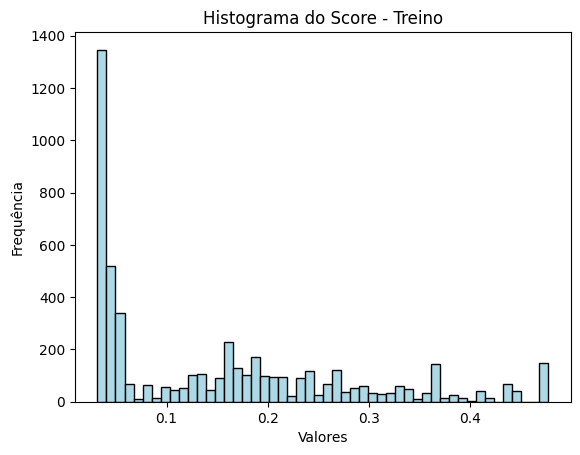

In [84]:
# Plotando o histograma
plt.hist(abt_treino_12.Score_1, color='lightblue', bins=50, edgecolor='black')
plt.title("Histograma do Score - Treino")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()


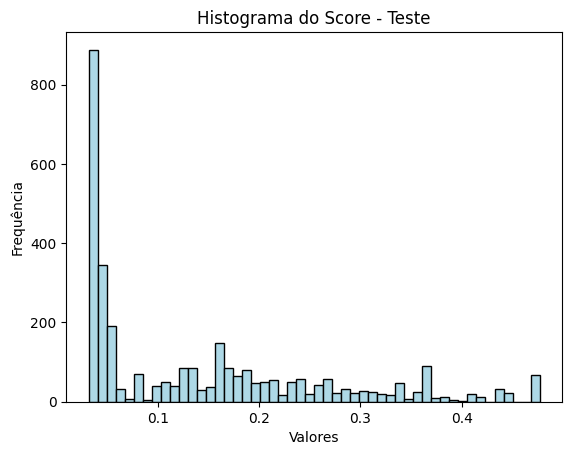

In [85]:
plt.hist(abt_oot_11.Score_1, color='lightblue', bins=50, edgecolor='black')
plt.title("Histograma do Score - Teste")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

In [86]:

abt_train_t02 = abt_treino_12.merge(abt_treino_11[['CHURN','PK_DATREF']], left_index=True, right_index=True, how='inner')
abt_teste_t02 = abt_oot_11.merge(abt_oot_10[['CHURN','PK_DATREF']], left_index=True, right_index=True, how='inner')



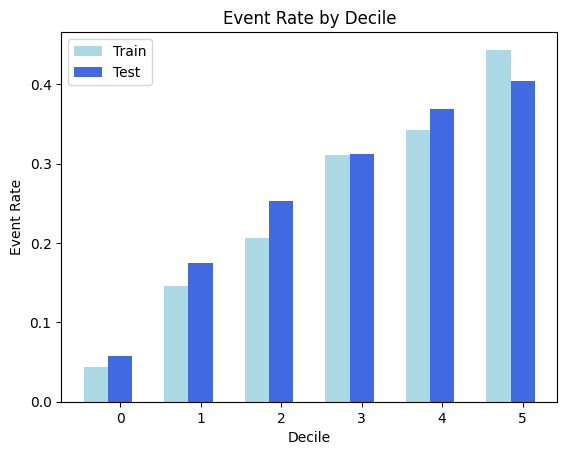

,Metric,Train Value,Test Value
0,KS,0.420818,0.404245
1,AUC,0.771641,0.750542
2,Gini,0.543282,0.501083


In [87]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import pandas as pd
import numpy as np

def calculate_metrics(train_df, test_df, score_column, target_column,bins=6):
    def compute_metrics(df, score_column, target_column):
        df_sorted = df.sort_values(by=score_column, ascending=False)

        # Calcular KS
        df_sorted['cum_good'] = (1 - df_sorted[target_column]).cumsum() / (1 - df_sorted[target_column]).sum()
        df_sorted['cum_bad'] = df_sorted[target_column].cumsum() / df_sorted[target_column].sum()
        df_sorted['ks'] = np.abs(df_sorted['cum_good'] - df_sorted['cum_bad'])
        ks_statistic = df_sorted['ks'].max()

        # Calcular AUC
        auc_value = roc_auc_score(df_sorted[target_column], df_sorted[score_column])

        # Calcular Gini
        gini = 2 * auc_value - 1

        # Dividir o score em 10 faixas
        df_sorted['decile'] = pd.cut(df_sorted[score_column], bins, labels=False)

        # Criar tabela detalhada
        table = df_sorted.groupby('decile').agg(
            min_score=pd.NamedAgg(column=score_column, aggfunc='min'),
            max_score=pd.NamedAgg(column=score_column, aggfunc='max'),
            event_rate=pd.NamedAgg(column=target_column, aggfunc='mean'),
            volume=pd.NamedAgg(column=target_column, aggfunc='size')
        ).reset_index()

        return ks_statistic, auc_value, gini, table

    ks_train, auc_train, gini_train, table_train = compute_metrics(train_df, score_column, target_column)
    ks_test, auc_test, gini_test, table_test = compute_metrics(test_df, score_column, target_column)

    # Plotando o gráfico de barras para Event Rate por Decil
    barWidth = 0.3
    r1 = np.arange(len(table_train))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, table_train['event_rate'], color='lightblue', width=barWidth, label='Train')
    plt.bar(r2, table_test['event_rate'], color='royalblue', width=barWidth, label='Test')

    plt.xlabel('Decile')
    plt.ylabel('Event Rate')
    plt.title('Event Rate by Decile')
    plt.xticks([r + barWidth for r in range(len(table_train))], table_train['decile'])
    plt.legend()
    plt.show()

    # Criando DataFrame para as métricas
    metrics_df = pd.DataFrame({
        'Metric': ['KS', 'AUC', 'Gini'],
        'Train Value': [ks_train, auc_train, gini_train],
        'Test Value': [ks_test, auc_test, gini_test]
    })

    return metrics_df, table_train, table_test

metrics, ord_score_train,vord_score_test = calculate_metrics(abt_train_t02, abt_teste_t02, 'Score_1', 'CHURN',bins=6)
metrics


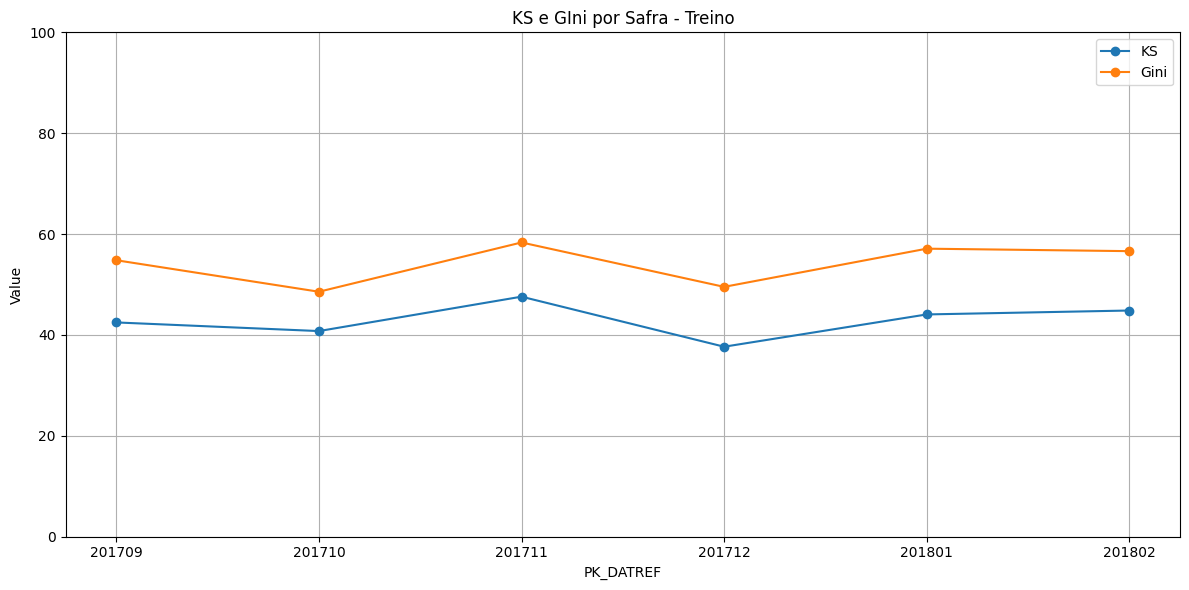

In [88]:
plot_ks_gini_by_datref(abt_train_t02, 'CHURN', 'Score_1', 'PK_DATREF',titulo='KS e GIni por Safra - Treino')

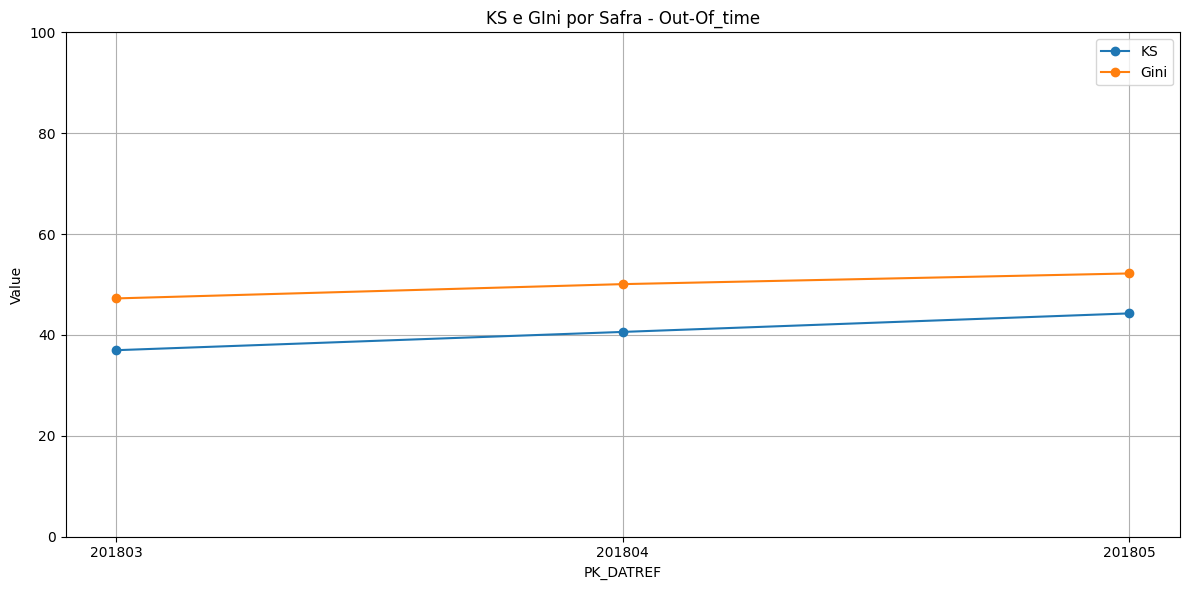

In [89]:
plot_ks_gini_by_datref(abt_teste_t02, 'CHURN', 'Score_1', 'PK_DATREF',titulo='KS e GIni por Safra - Out-Of_time')